# CAPSTONE 2 SUPERMARKET CUSTOMERS

# LATAR BELAKANG

Di sebuah supermarket besar yang bertujuan untuk meningkatkan kinerja pemasaran dan penjualan, manajemen melihat adanya potensi yang belum dimanfaatkan dalam kampanye pemasaran dan produk unggulan mereka. Kami menyadari bahwa untuk tetap kompetitif di industri yang semakin menantang, kami perlu lebih memahami preferensi pelanggan dan perilaku pembelian mereka, serta memperbarui strategi pemasaran agar lebih efektif.

Kami juga menyadari bahwa satu strategi pemasaran tidak akan cocok untuk semua pelanggan, mengingat perbedaan generasi dan kelas sosial. Oleh karena itu, kami ingin mengidentifikasi jenis kampanye yang paling efektif untuk menarik minat berbagai generasi pelanggan dan kelas sosial. Selain itu, kami juga bertujuan untuk memahami langkah-langkah yang dapat dilakukan untuk meningkatkan penjualan produk yang kurang populer dan mengidentifikasi produk baru yang berpotensi menjadi pemimpin pasar.

# RUMUSAN MASALAH



- Menganalisis data untuk mengidentifikasi produk yang menghasilkan revenue besar dan produk dengan revenue yang tidak terlalu besar, serta menentukan langkah-langkah strategis untuk meningkatkan penjualan produk dengan revenue rendah sekaligus meningkatkan dominasi produk yang sudah mendominasi revenue.



- Melakukan pendekatan pelanggan berdasarkan demografi, termasuk generasi, tingkat pendidikan, pendapatan, status pernikahan, dan jumlah anak, guna merancang strategi pemasaran yang lebih efektif dan relevan sesuai dengan preferensi dan karakteristik setiap kelompok pelanggan.



- Mengatasi tantangan dalam menentukan skema bundling produk yang optimal untuk menarik minat konsumen, mendorong pembelian lintas kategori, dan meningkatkan total penjualan supermarket.

# DATA UNDERSTANDING


 People
 - ID:Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

 Products
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years

 Promotion
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
 
 Place
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to the company’s website in the last mont

 Z-score
 - Z_CostContact = menunjukkan biaya atau pengeluaran dalam bentuk Z-score, mengindikasikan seberapa besar pengeluaran dibandingkan dengan rata-rata biaya
 - Z_Revenue = menunjukkan pendapatan pelanggan dalam bentuk Z-score, mengindikasikan seberapa besar pendapatan tersebut dibandingkan dengan rata-rata.

 additional :
 - Age Column
 - Generation
 - Children
 - Income_Class

# DATA CLEANING AND PRE-PROCESSING

## IMPORT LIBRARY

In [894]:
import datetime as dt
import plotly

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from operator import attrgetter


import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm

from sklearn.impute import SimpleImputer

#----------------------------------------------------------------------------------------------------------------------------
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns  # Library untuk visualisasi data
import matplotlib.pyplot as plt  # Library untuk membuat grafik
import warnings  # Library untuk pengaturan peringatan
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)




In [902]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

dari info diatas kita bisa melihat ada ketidak-cocokan tipe data pada "Dt_Customer"

In [905]:
df["ID"] = df["ID"].astype(str)

In [906]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [907]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [908]:
display(df.describe().round(2), df.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2216.00,2240.00,2240.00,2240,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,1968.81,52247.25,0.44,0.51,2013-07-10 10:01:42.857142784,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
min,1893.00,1730.00,0.00,0.00,2012-07-30 00:00:00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,1959.00,35303.00,0.00,0.00,2013-01-16 00:00:00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,1970.00,51381.50,0.00,0.00,2013-07-08 12:00:00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,1977.00,68522.00,1.00,1.00,2013-12-30 06:00:00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,1996.00,666666.00,2.00,2.00,2014-06-29 00:00:00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00
std,11.98,25173.08,0.54,0.54,NaN,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36


,ID,Education,Marital_Status
count,2240,2240,2240
unique,2240,5,8
top,5524,Graduation,Married
freq,1,1127,864


## Data duplikat

In [910]:
df.duplicated().sum()

0

## Buat kolom baru "Age"

In [912]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [913]:
reference_date = df['Dt_Customer'].max() + dt.timedelta(days=365)
reference_date


Timestamp('2015-06-29 00:00:00')

`Catatan`: Saya mengasumsikan analisis dilakukan satu tahun setelahnya

In [915]:
current_year = 2015
df['Age'] = current_year - df['Year_Birth']

In [916]:
df[['Year_Birth','Age']]

,Year_Birth,Age
0,1957,58
1,1954,61
2,1965,50
3,1984,31
4,1981,34
...,...,...
2235,1967,48
2236,1946,69
2237,1981,34
2238,1956,59


## Membuat group kategori baru untuk marital status

In [918]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [919]:
df['Marital_Status'] = df['Marital_Status'].replace({'Single'    : 'Single',
                                                     'Divorced'  : 'Divorced', 
                                                     'Widow'     : 'Divorced',
                                                     'Alone'     : 'Single',
                                                     'Absurd'    : 'Single',
                                                     'YOLO'      : 'Single',
                                                     'Together'  : 'Couple',
                                                     'Married'   : 'Couple'})

#### check new group

In [921]:
df[df['ID']==5250]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age


## Membuat group kategori baru untuk generasi 

In [923]:
df['Year_Birth'].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [924]:
df['Year_Birth'].max()

1996

In [925]:
df['Year_Birth'].min()

1893

In [926]:
# Buat kolom kategori generasi
df['Generation'] = np.select(
    [
        (df['Year_Birth'] >= 1928) & (df['Year_Birth'] <= 1945),  # Silent Generation
        (df['Year_Birth'] >= 1946) & (df['Year_Birth'] <= 1964),  # Baby Boomers
        (df['Year_Birth'] >= 1965) & (df['Year_Birth'] <= 1980),  # Generation X
        (df['Year_Birth'] >= 1981) & (df['Year_Birth'] <= 1996),  # Millennials
    ],
    [
        'Silent Generation',
        'Baby Boomers',
        'Generation X',
        'Millennials'
    ],
    default='Unknown'
)

# Periksa data baru
df[['Year_Birth', 'Age', 'Generation']]



,Year_Birth,Age,Generation
0,1957,58,Baby Boomers
1,1954,61,Baby Boomers
2,1965,50,Generation X
3,1984,31,Millennials
4,1981,34,Millennials
...,...,...,...
2235,1967,48,Generation X
2236,1946,69,Baby Boomers
2237,1981,34,Millennials
2238,1956,59,Baby Boomers


## Membuat kategori baru untuk edukasi

In [928]:
df['Education'] = df['Education'].replace({'2n Cycle'   : 'Postgraduate',
                                           'Basic'      : 'School',
                                           'Graduation' : 'Undergraduate',
                                           'Master'     : 'Postgraduate',
                                           'PhD'        : 'Postgraduate',
                                           'Master'     : 'Postgraduate'})

## Menangani nilai yang hilang

In [930]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Generation              0
dtype: int64

In [931]:
(df.isna().sum() / len(df) * 100).round(2)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
Age                    0.00
Generation             0.00
dtype: float64

## Menangani nilai yang hilang di kolom income

In [933]:
from scipy.stats import shapiro

stat, p = shapiro(df['Income'].dropna())
print(f'Statistik: {stat}, p-value: {p}')
if p > 0.05:
    print("Data berdistribusi normal.")
else:
    print("Data tidak berdistribusi normal.")

Statistik: 0.777054527062812, p-value: 8.245966075905192e-48
Data tidak berdistribusi normal.


In [934]:
# Cek baris dengan nilai kosong pada kolom Income tetapi memiliki nilai di kolom Education
missing_income_with_education = df[df['Income'].isna() & df['Education'].notna()][['ID','Income', 'Education']]

# Menampilkan hasil
missing_income_with_education


,ID,Income,Education
10,1994,NaN,Undergraduate
27,5255,NaN,Undergraduate
43,7281,NaN,Postgraduate
48,7244,NaN,Undergraduate
58,8557,NaN,Undergraduate
71,10629,NaN,Postgraduate
90,8996,NaN,Postgraduate
91,9235,NaN,Undergraduate
92,5798,NaN,Postgraduate
128,8268,NaN,Postgraduate


In [935]:
df['Education'].unique()

array(['Undergraduate', 'Postgraduate', 'School'], dtype=object)

In [936]:
# Menghitung  median Income berdasarkan Education
median_income = df.groupby('Education')['Income'].median()

# Menggabungkan hasil dalam satu DataFrame
income_stats = pd.DataFrame({'Median Income': median_income})

# Menampilkan hasil
print(income_stats)

               Median Income
Education                   
Postgraduate         52605.5
School               20744.0
Undergraduate        52028.5


In [937]:
# Membuat objek SimpleImputer dengan strategi median
median_imputer = SimpleImputer(strategy='median')

# Mengimputasi nilai hilang di kolom Income berdasarkan kategori Education
df['Income'] = df.groupby('Education')['Income'].transform(
    lambda x: median_imputer.fit_transform(x.values.reshape(-1, 1)).flatten()
)

## Cek ulang nilai yang hilang

In [939]:
ids_to_filter = [
    1994, 5255, 7281, 7244, 8557, 10629, 8996, 9235, 5798, 8268,
    1295, 2437, 2863, 10475, 2902, 4345, 3769, 7187, 1612, 5079,
    10339, 3117, 5250, 8720
]


# Memfilter DataFrame berdasarkan ID
filtered_data = df[df['ID'].isin(ids_to_filter)]

filtered_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Generation


# Menangani Outlier

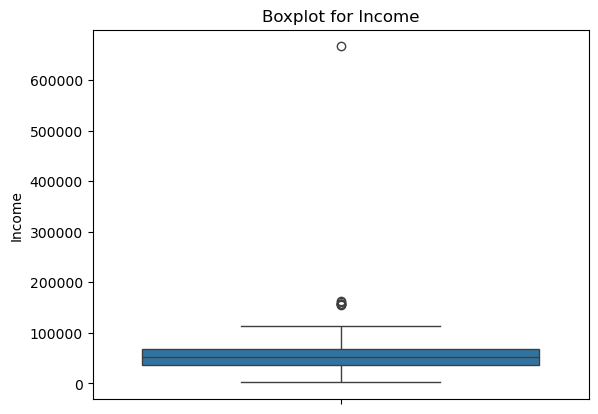

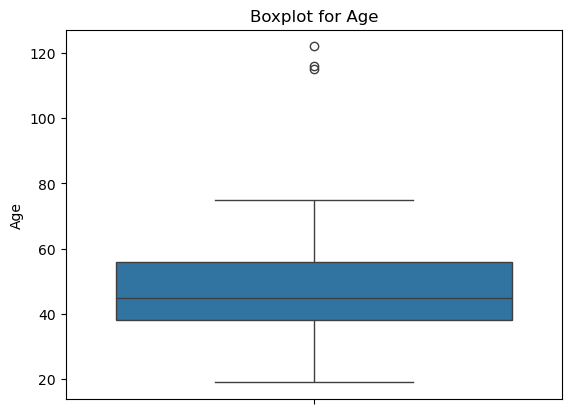

In [941]:
# outlier in columns age
# Boxplot untuk satu kolom
sns.boxplot(data=df['Income'])
plt.title('Boxplot for Income')
plt.show()

sns.boxplot(data=df['Age'])
plt.title('Boxplot for Age')
plt.show()



In [942]:
# Menentukan batas IQR untuk kolom Income
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Menentukan batas IQR untuk kolom Year_Birth
Q1_birth = df['Age'].quantile(0.25)
Q3_birth = df['Age'].quantile(0.75)
IQR_birth = Q3_birth - Q1_birth
lower_bound_birth = Q1_birth - 1.5 * IQR_birth
upper_bound_birth = Q3_birth + 1.5 * IQR_birth

print(f"Lower bound Income: {lower_bound_income}")
print(f"Upper bound Income: {upper_bound_income}")
print(f"Lower bound Age: {lower_bound_birth}")
print(f"Upper bound Age: {upper_bound_birth}")

Lower bound Income: -13587.75
Upper bound Income: 117416.25
Lower bound Age: 11.0
Upper bound Age: 83.0


In [943]:
df[df['Age'] > 83.0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Generation
192,7829,1900,Postgraduate,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,1,3,11,0,115,Unknown
239,11004,1893,Postgraduate,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,3,11,0,122,Unknown
339,1150,1899,Postgraduate,Couple,83532.0,0,0,2013-09-26,36,755,...,0,1,0,0,0,3,11,0,116,Unknown


In [944]:
df[df['Income']> 117416.25]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Generation
164,8475,1973,Postgraduate,Couple,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,3,11,0,42,Generation X
617,1503,1976,Postgraduate,Couple,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,3,11,0,39,Generation X
655,5555,1975,Undergraduate,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,3,11,0,40,Generation X
687,1501,1982,Postgraduate,Couple,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,3,11,0,33,Millennials
1300,5336,1971,Postgraduate,Couple,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,3,11,0,44,Generation X
1653,4931,1977,Undergraduate,Couple,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,3,11,0,38,Generation X
2132,11181,1949,Postgraduate,Couple,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,3,11,0,66,Baby Boomers
2233,9432,1977,Undergraduate,Couple,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,0,3,11,0,38,Generation X


In [945]:
df_cleaned = df.drop(df[(df['Age'] > 83) | (df['Income'] > 200000)].index)

Pendapatan antara  `Upper Bound` hingga di bawah 200 ribu dapat diklasifikasikan sebagai normal karena sebagian besar dari mereka adalah Postgraduate, juga tinggal bersama pasangan dan keluarga mereka

Namun, Pendapatan di atas 200 ribu sangat aneh dan akan dihapus

In [947]:
df_cleaned[df_cleaned['Income']> 117416.25]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Generation
164,8475,1973,Postgraduate,Couple,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,3,11,0,42,Generation X
617,1503,1976,Postgraduate,Couple,162397.0,1,1,2013-06-03,31,85,...,0,0,0,0,0,3,11,0,39,Generation X
655,5555,1975,Undergraduate,Divorced,153924.0,0,0,2014-02-07,81,1,...,0,0,0,0,0,3,11,0,40,Generation X
687,1501,1982,Postgraduate,Couple,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,0,3,11,0,33,Millennials
1300,5336,1971,Postgraduate,Couple,157733.0,1,0,2013-06-04,37,39,...,0,0,0,0,0,3,11,0,44,Generation X
1653,4931,1977,Undergraduate,Couple,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,3,11,0,38,Generation X
2132,11181,1949,Postgraduate,Couple,156924.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,3,11,0,66,Baby Boomers


## Buat kolom baru untuk jumlah anak dirumah

In [949]:
df_cleaned['Children'] = df_cleaned['Kidhome'] + df_cleaned['Teenhome']


Untuk mempermudah proses analisis saya satukan kolom anak kecil dan remaja menjadi anak

## Buat kategori kelas sosial untuk income

In [952]:
pd.DataFrame(df_cleaned['Income'].unique())

,0
0,58138.0
1,46344.0
2,71613.0
3,26646.0
4,58293.0
...,...
1967,26816.0
1968,61223.0
1969,56981.0
1970,69245.0


### Social Class Berdasarkan Pendapatan Tahunan di AS

1. **Upper Class (Kelas Atas)**:
   - **Pendapatan Tahunan**: **$200,000 ke atas**.

2. **Upper-Middle Class (Kelas Menengah Atas)**:
   - **Pendapatan Tahunan**: **$115,000 - $200,000**.
]
3. **Middle Class (Kelas Menengah)**:
   - **Pendapatan Tahunan**: **$50,000 - $115,000**.

4. **Lower-Middle Class (Kelas Menengah Bawah)**:
   - **Pendapatan Tahunan**: **$30,000 - $50,000**.

5. **Lower Class (Kelas Bawah)**:
   - **Pendapatan Tahunan**: **Di bawah $30,000**.

Sumber : https://pressbooks.howardcc.edu/soci101/chapter/8-3-social-class-in-the-united-states/

In [954]:
def classify_income(income):
    if income < 30000:
        return "Lower Class"
    elif income < 50000:
        return "Lower-Middle Class"
    elif income < 115000:
        return "Middle Class"
    elif income < 200000:
        return "Upper-Middle Class"
    else:
        return "Upper Class"

df_cleaned['Income_Class'] = df_cleaned['Income'].apply(classify_income)


In [955]:
df_cleaned['Income_Class'].value_counts()

Income_Class
Middle Class          1170
Lower-Middle Class     689
Lower Class            370
Upper-Middle Class       7
Name: count, dtype: int64

In [956]:
df_cleaned.shape

(2236, 33)

In [957]:
df_cleaned.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
Generation             0
Children               0
Income_Class           0
dtype: int64

## Hapus kolom yang tidak diperlukan

In [959]:
df_cleaned=df_cleaned.drop(columns=['Z_Revenue', 'Z_CostContact','Recency','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain','NumDealsPurchases', 'NumWebPurchases', 'Response'])


In [960]:
df_cleaned.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age',
       'Generation', 'Children', 'Income_Class'],
      dtype='object')

In [1051]:
df_cleaned.to_csv('new.csv', index=False)

# Identifikasi Produk Berdasarkan Revenue

In [963]:
#pengeluaran per kategori produk
category_spending = df_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


category_spending.sum()


MntWines            680029
MntFruits            58753
MntMeatProducts     373375
MntFishProducts      83931
MntSweetProducts     60552
MntGoldProds         98346
dtype: int64

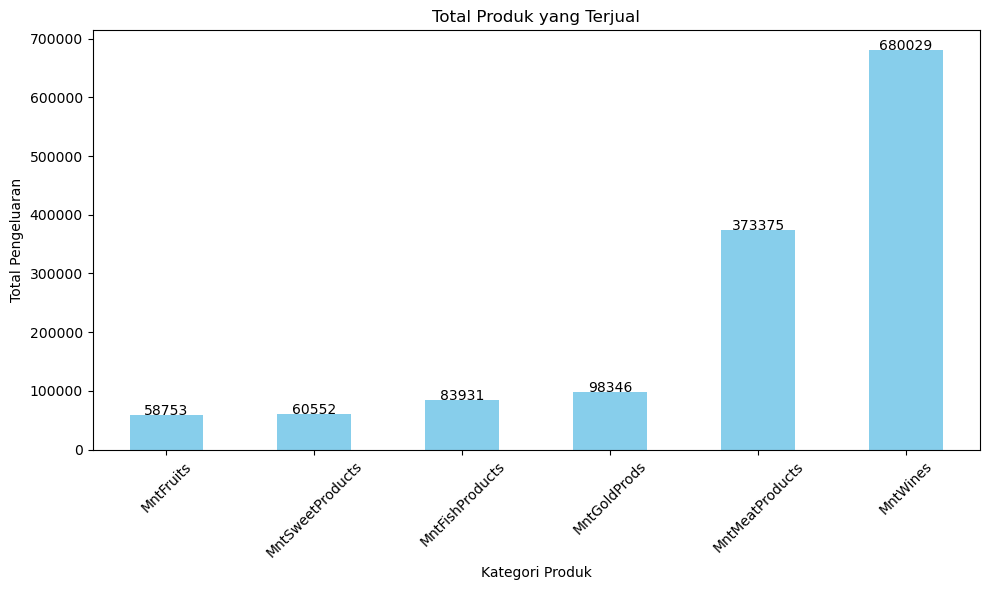

In [964]:
# Visualisasi total produk yang terjual
plt.figure(figsize=(10, 6))
ax = category_spending.sum().sort_values().plot(kind='bar', color='skyblue')

# Menambahkan nilai pada setiap bar
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2,  # Posisi horizontal di tengah batang
             p.get_height() + 5,             # Posisi vertical sedikit di atas batang
             f'{p.get_height():.0f}',        # Nilai angka (tanpa desimal)
             ha='center', fontsize=10)       # Gaya teks

plt.title('Total Produk yang Terjual')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pengeluaran')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insight Singkat:

**Produk Terlaris:**
Wine (MntWines) dan Daging (MntMeatProducts) mendominasi penjualan, mencerminkan preferensi pelanggan terhadap produk premium dan kebutuhan pokok.

**Produk Kurang Populer:**
Buah (MntFruits), Ikan (MntFishProducts), dan Produk Emas (MntGoldProds) memiliki penjualan lebih rendah, memerlukan promosi lebih intensif.

**Gap Penjualan:**
Penjualan wine hampir 10 kali lipat lebih besar dari buah, menunjukkan fokus pelanggan pada produk premium dibanding produk sehat.


## Identifikasi Pendekatan Berbasis Demografi:

In [967]:
# Daftar kolom produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Kelompokkan berdasarkan demografi
demographics = ['Generation', 'Education', 'Income_Class', 'Marital_Status',['Children']]

for demo in demographics:
    print(f"\nTotal pengeluaran berdasarkan {demo}:\n")
    grouped_data = df_cleaned.groupby(demo)[product_columns].sum()
    print(grouped_data)




Total pengeluaran berdasarkan Generation:

                   MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Generation                                                                 
Baby Boomers         281786      20844           137138            31367   
Generation X         287361      25612           157852            35276   
Millennials           97481      11018            71191            15431   
Silent Generation     13401       1279             7194             1857   

                   MntSweetProducts  MntGoldProds  
Generation                                         
Baby Boomers                  21603         37690  
Generation X                  26894         43073  
Millennials                   10952         16593  
Silent Generation              1103           990  

Total pengeluaran berdasarkan Education:

               MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                              


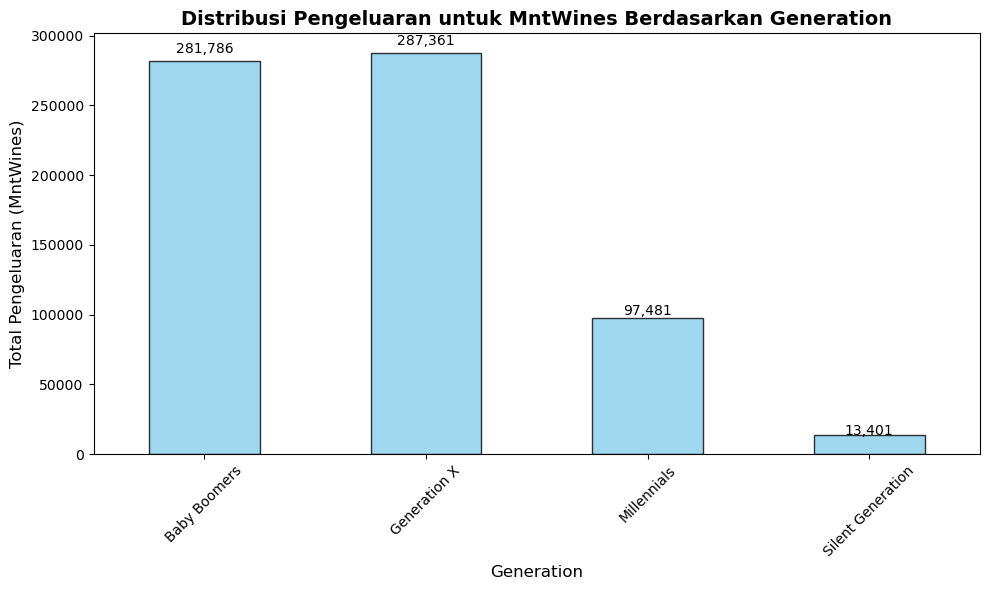

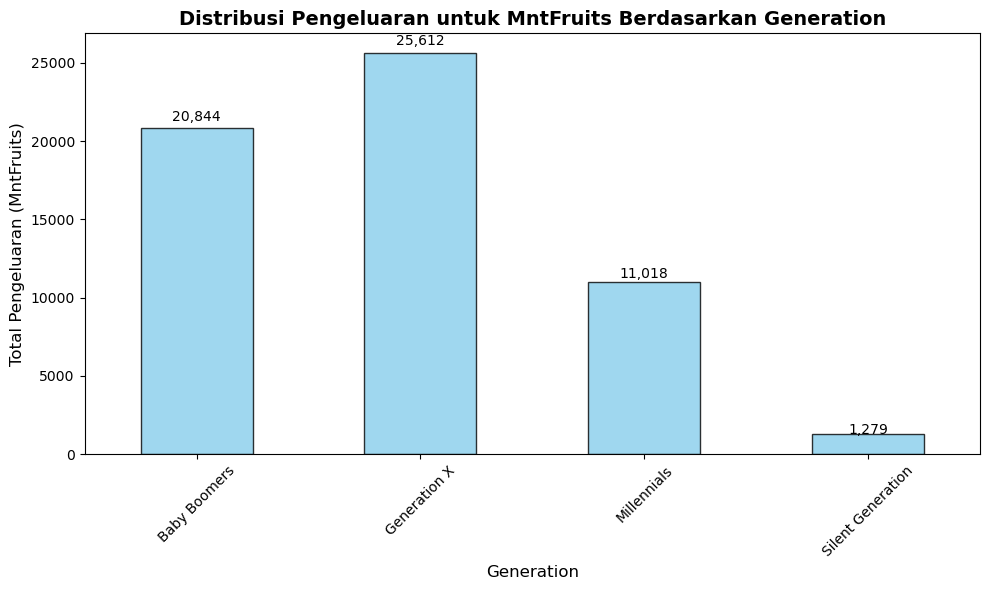

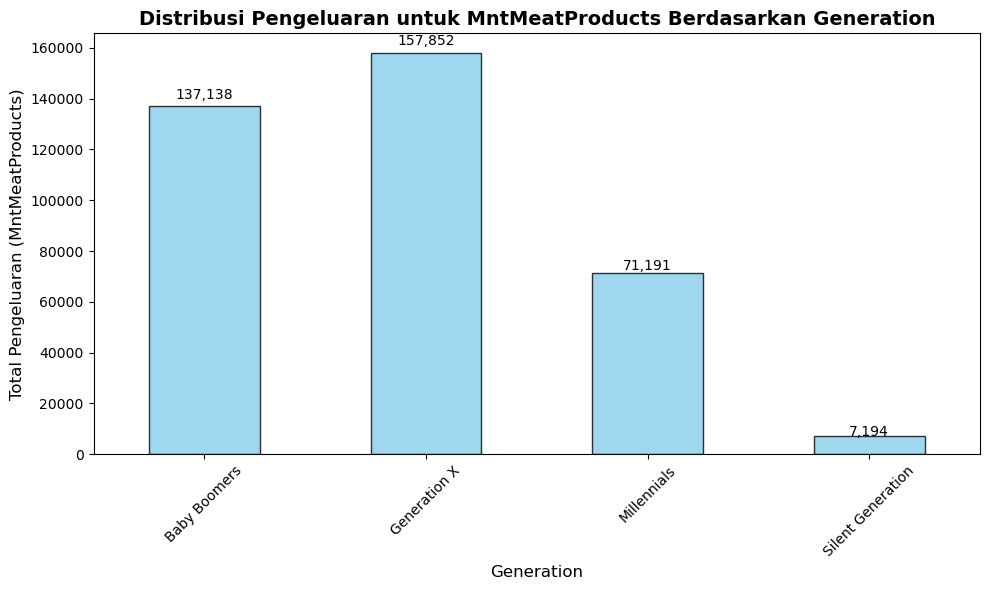

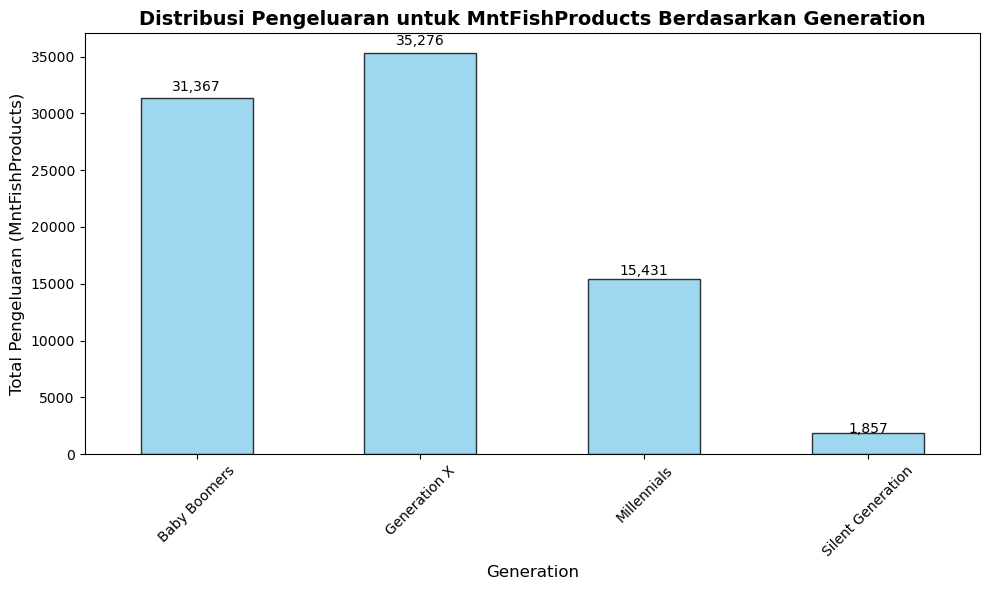

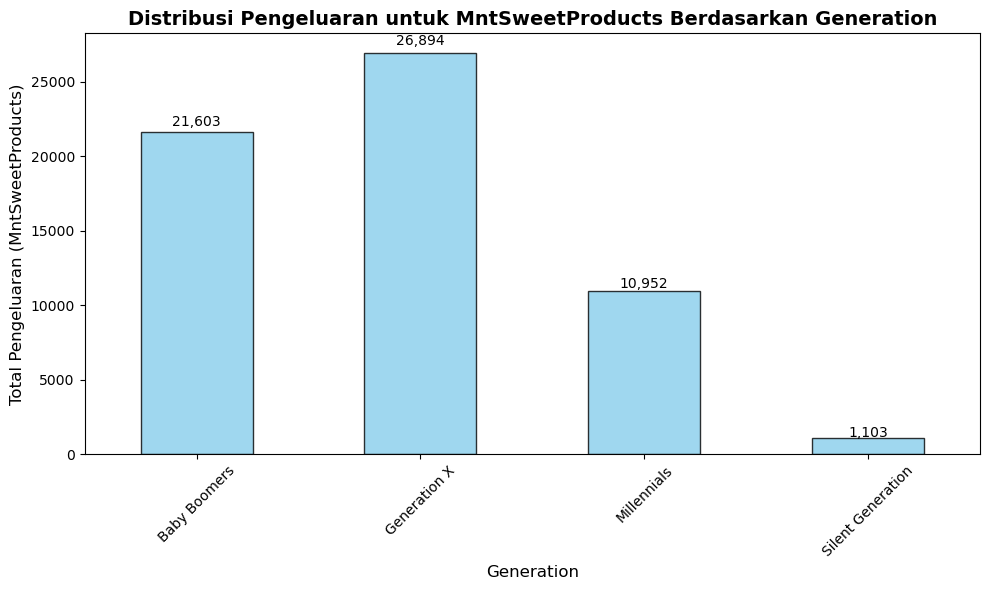

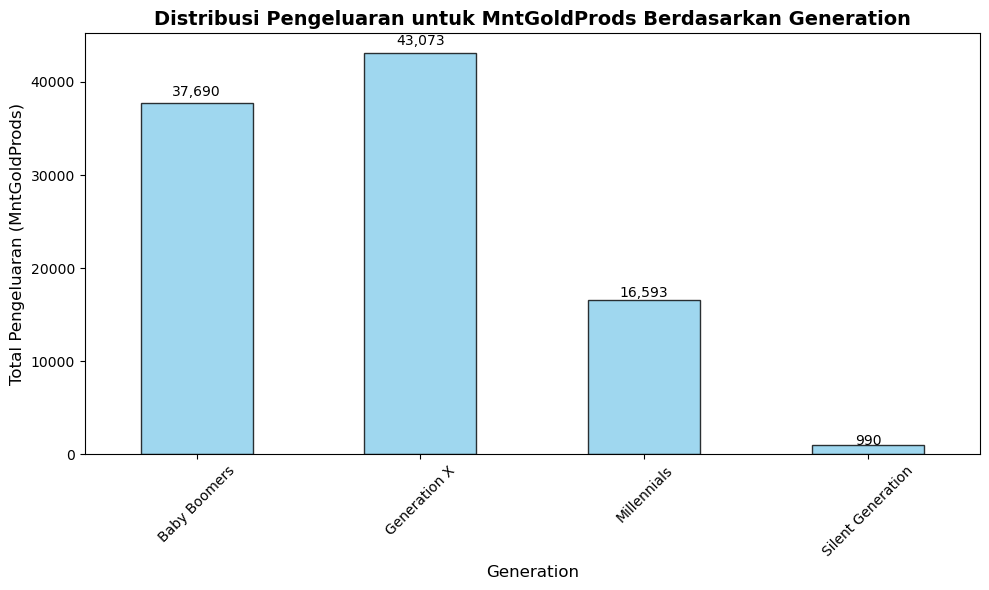

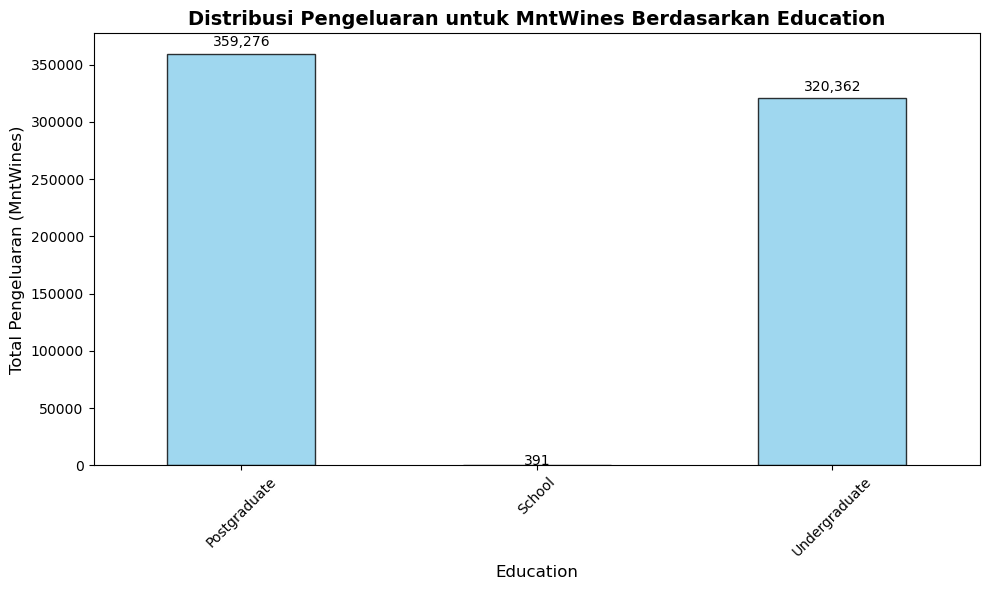

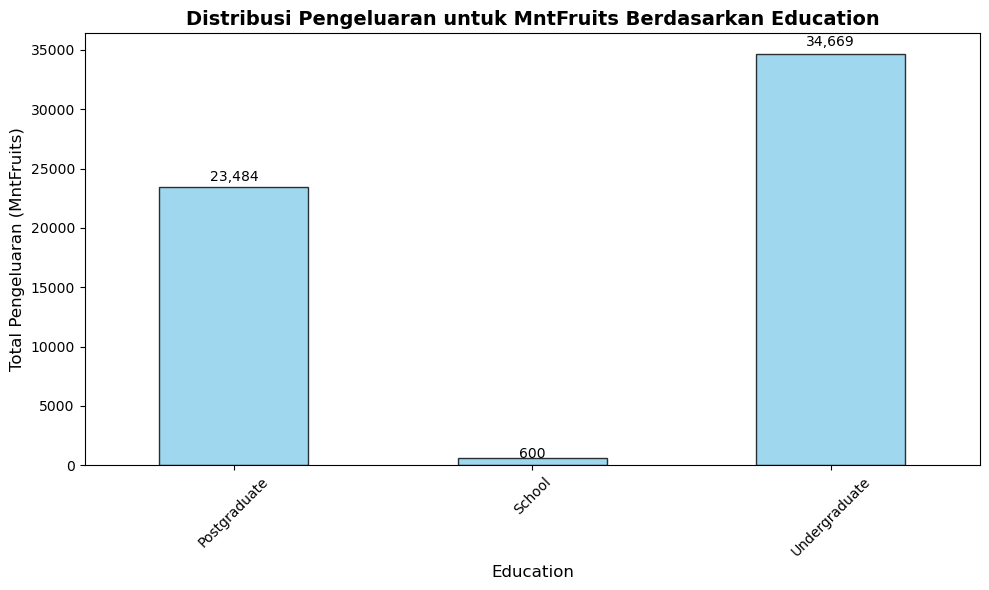

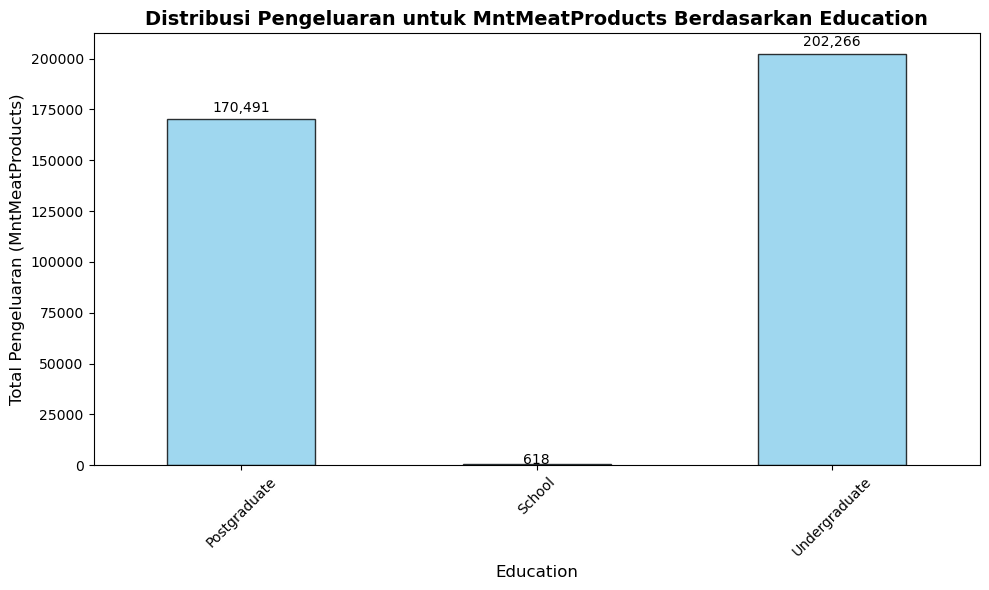

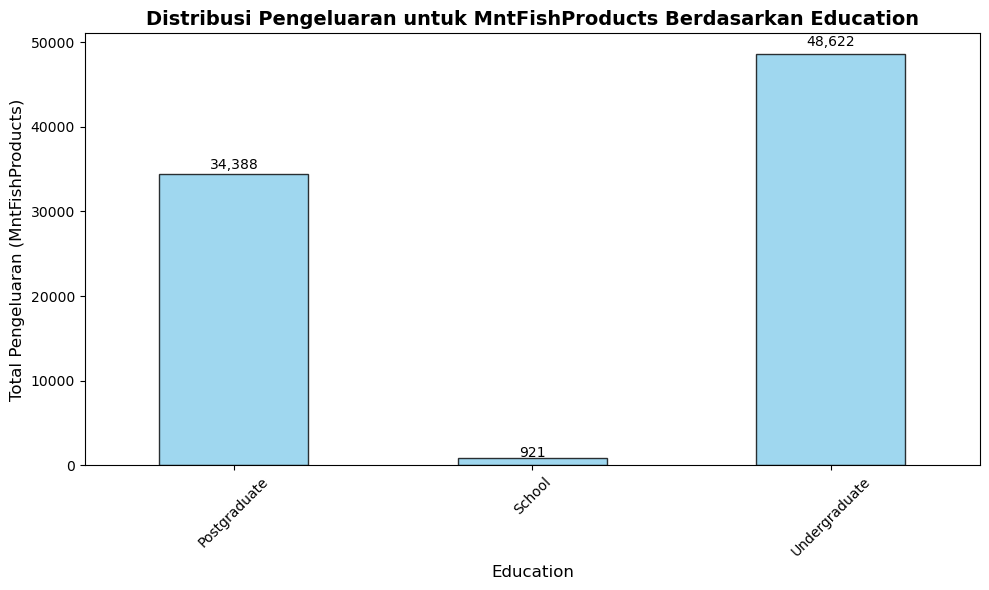

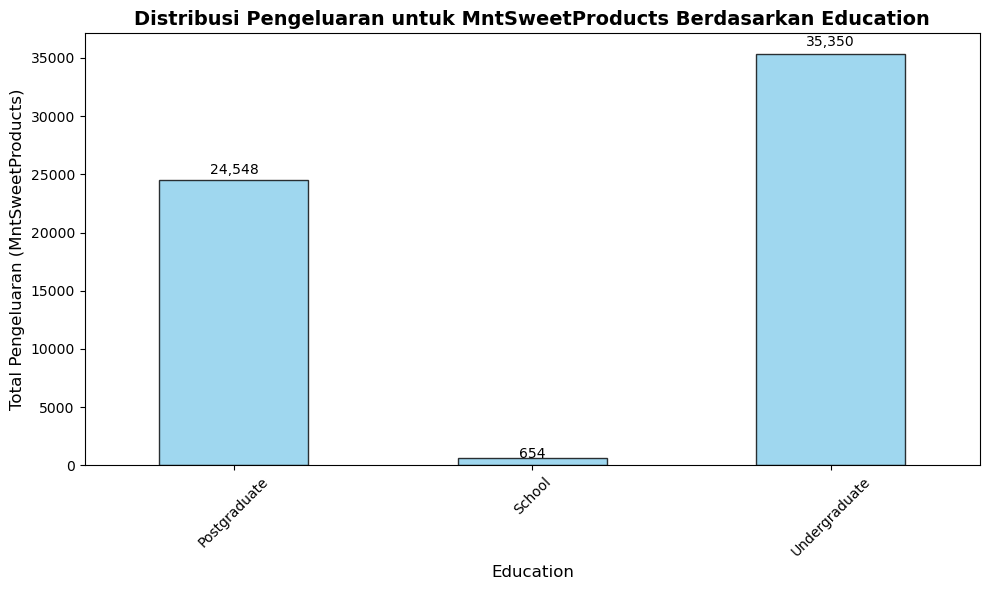

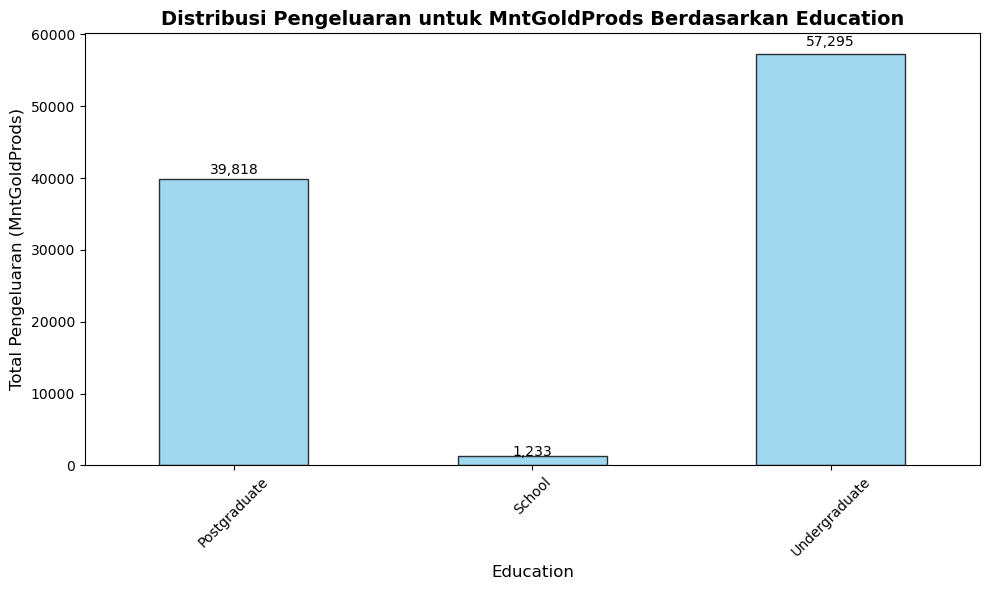

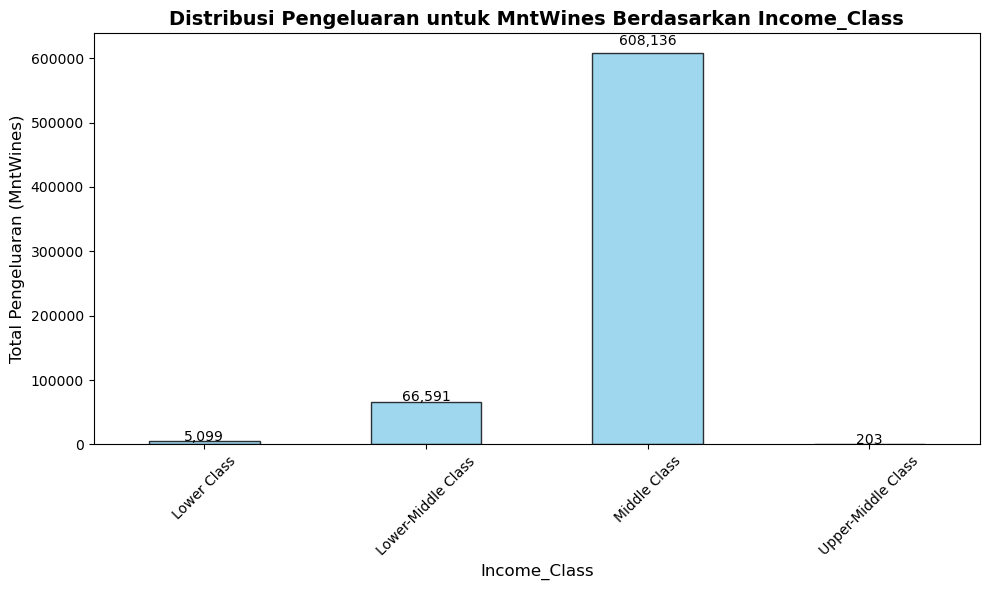

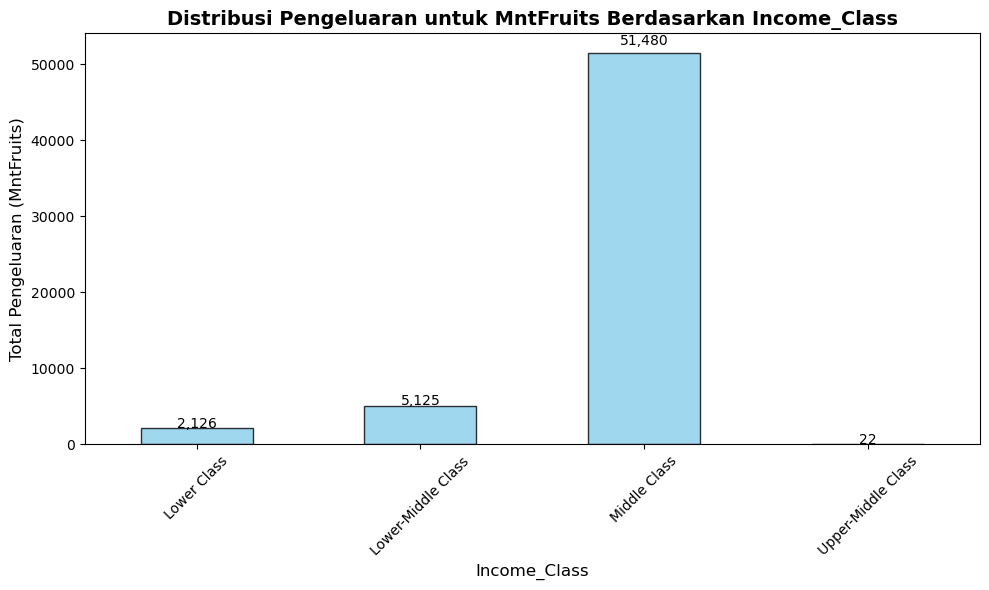

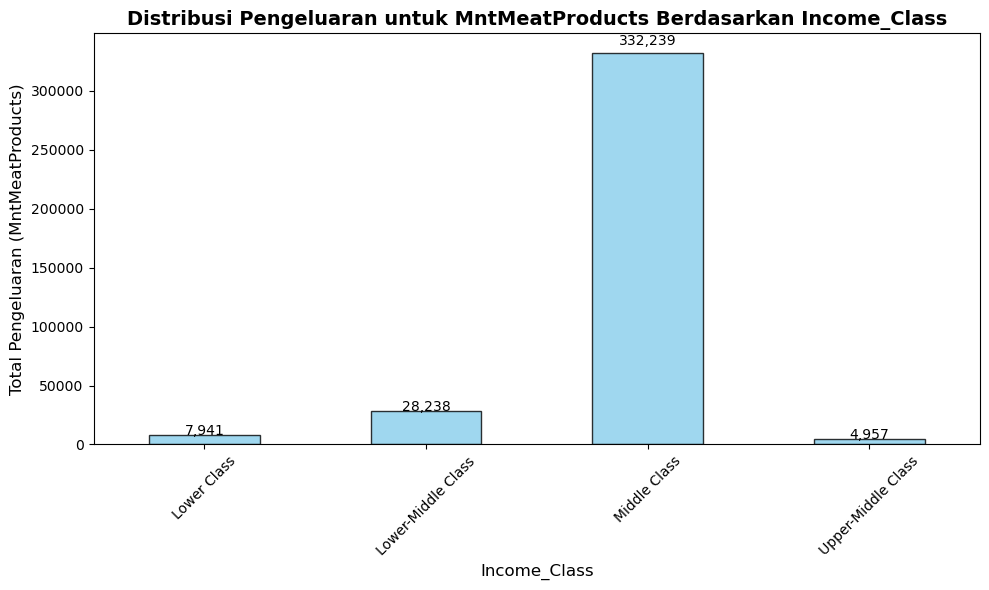

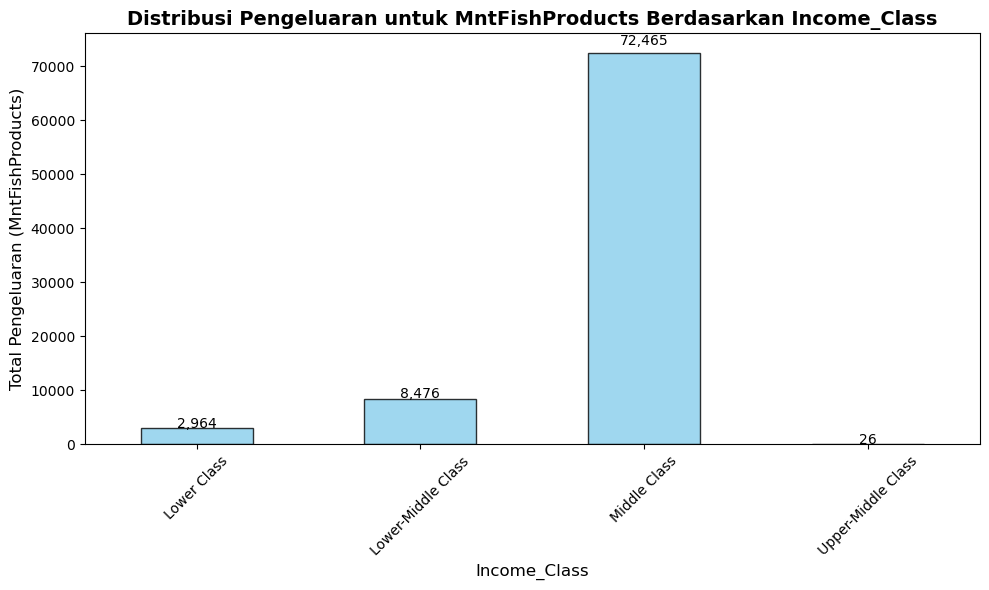

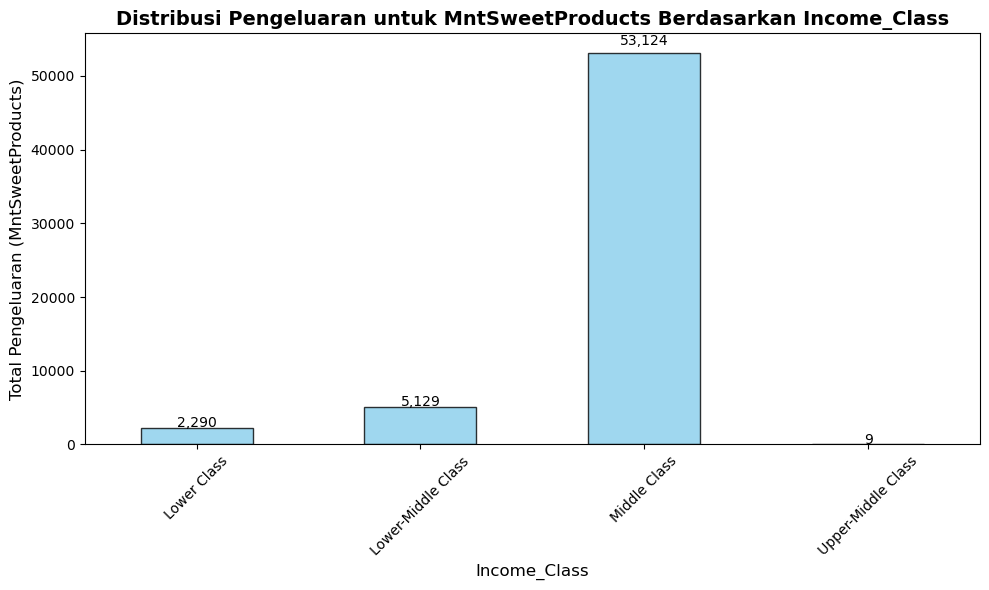

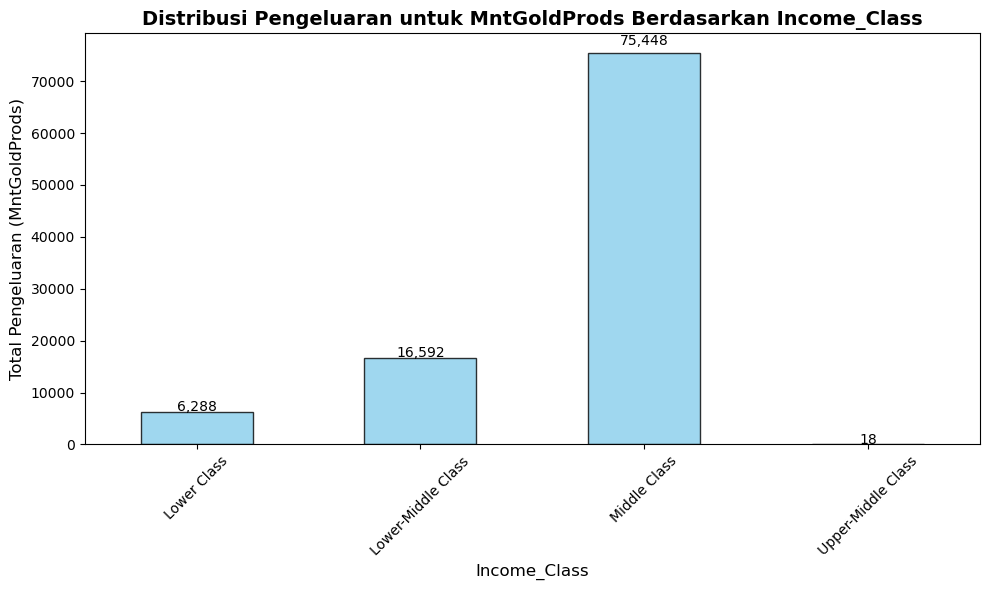

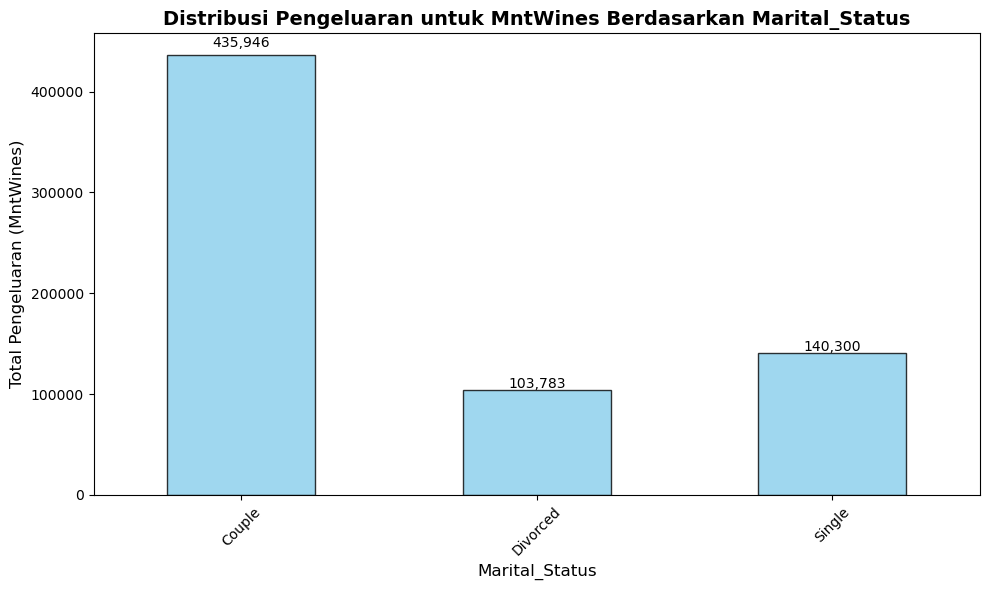

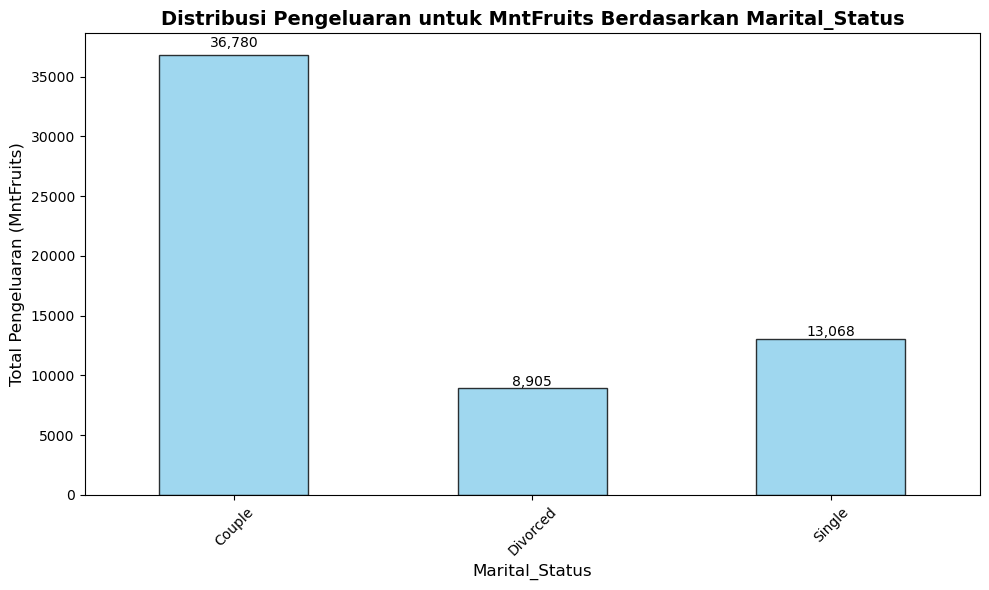

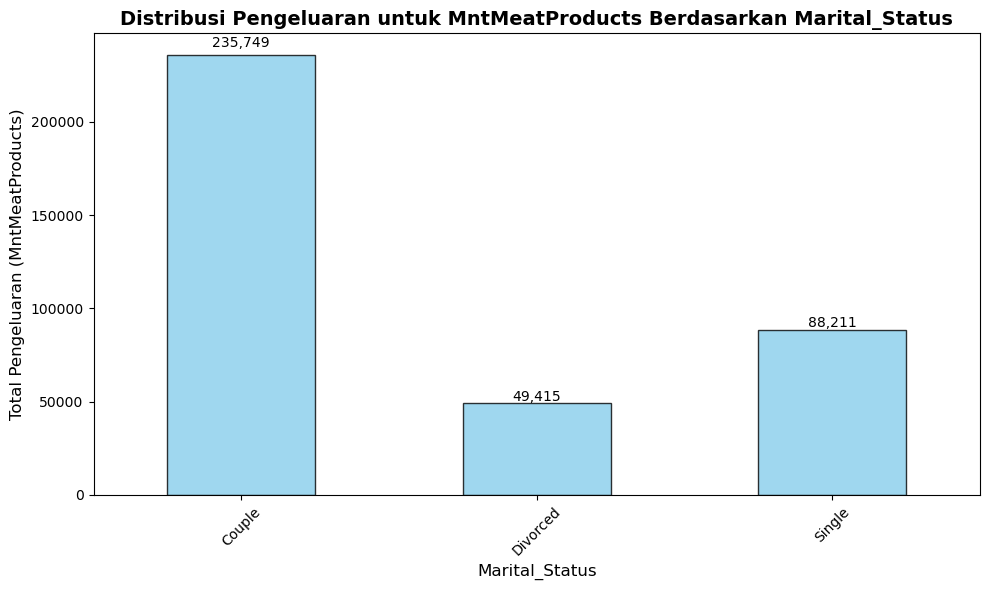

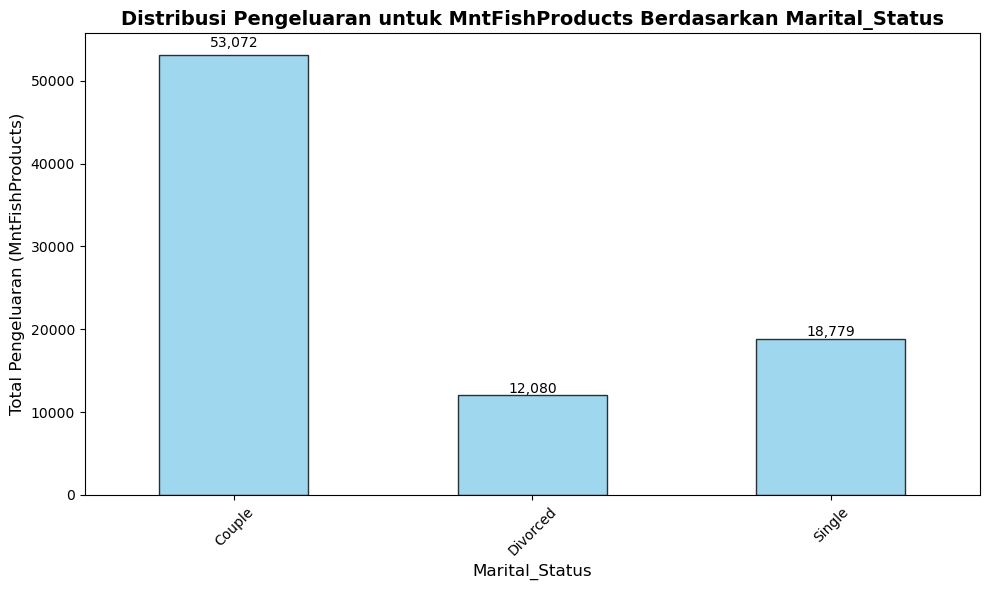

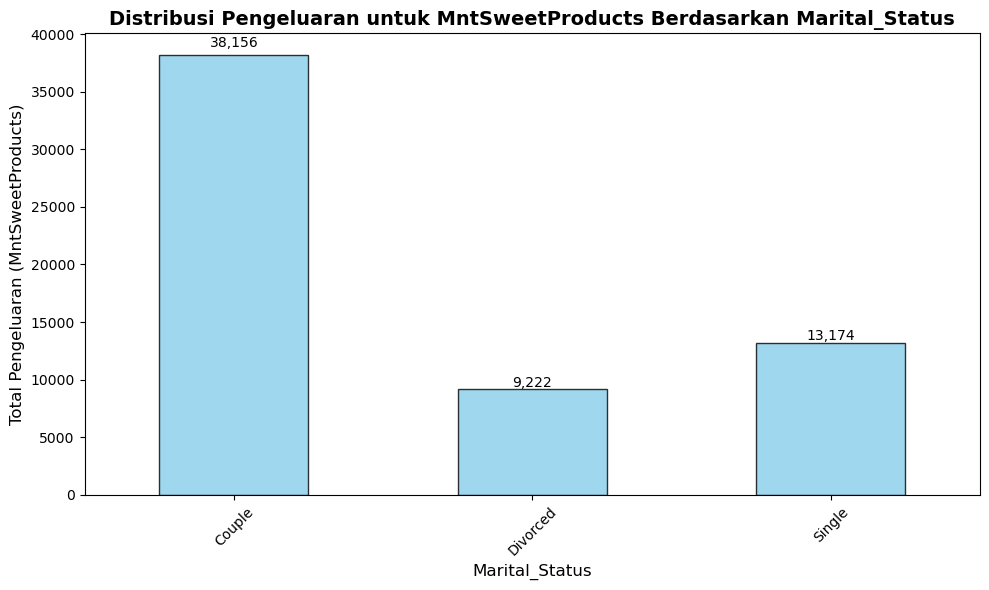

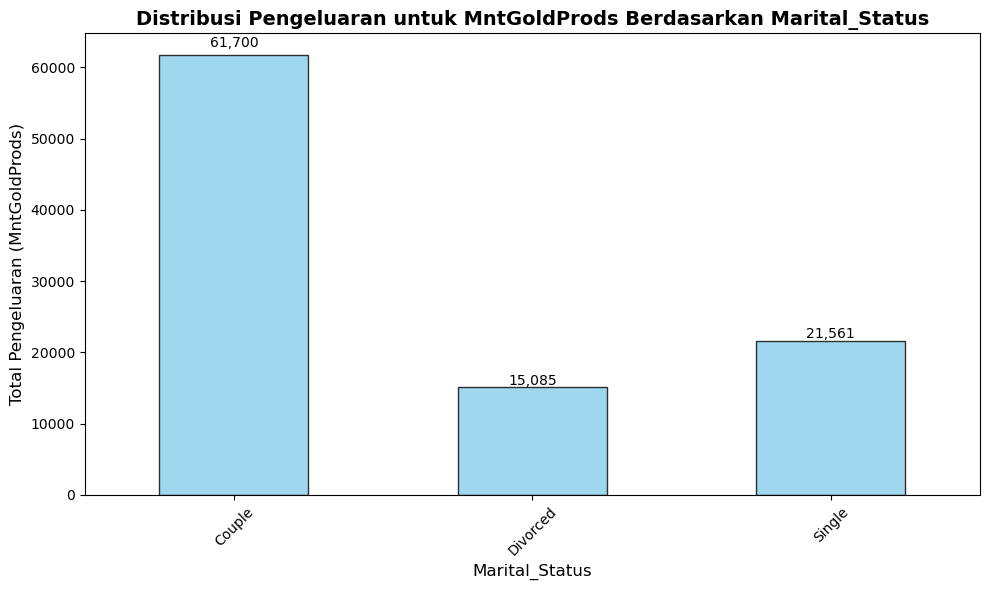

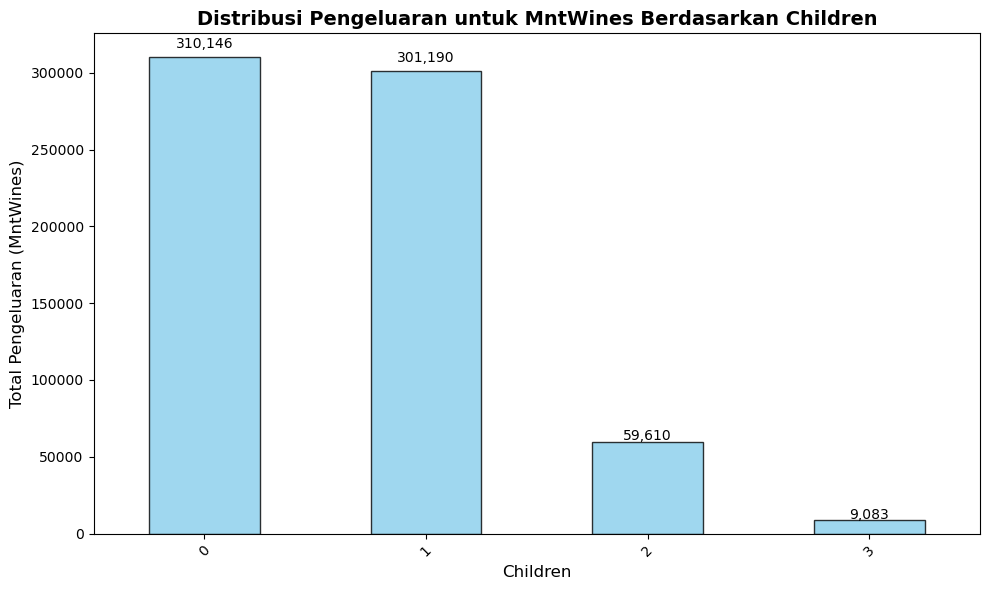

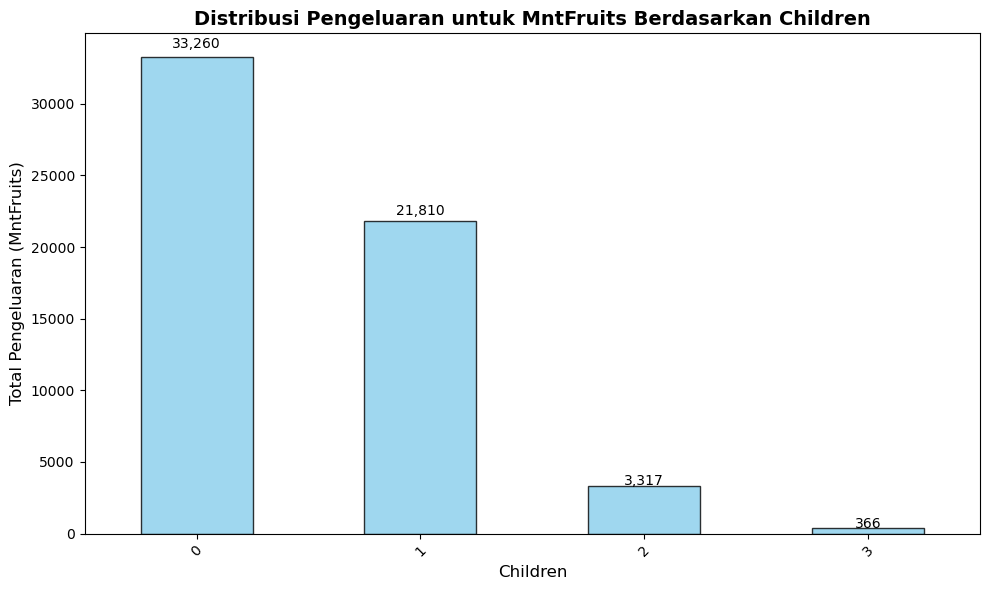

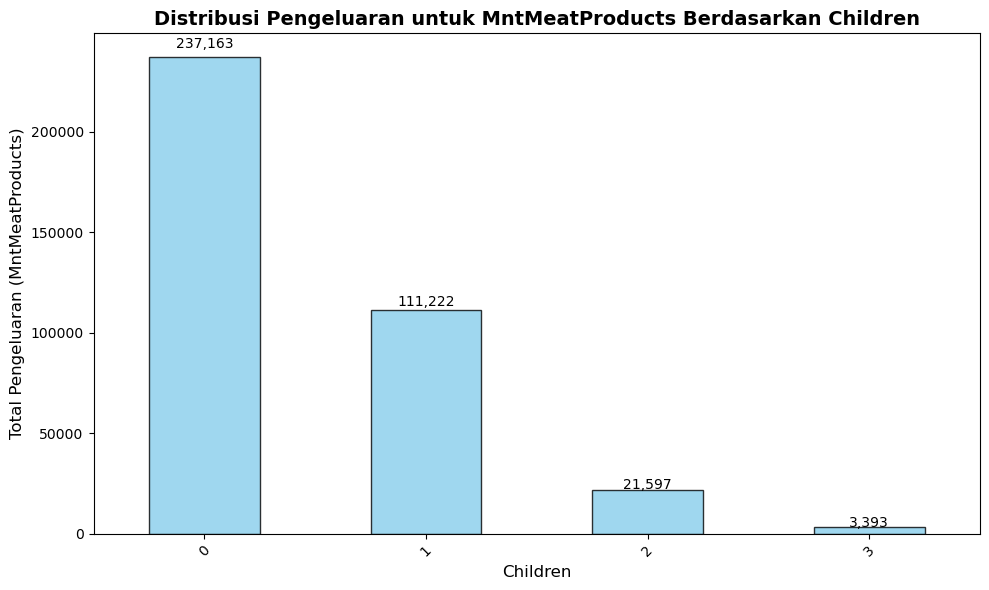

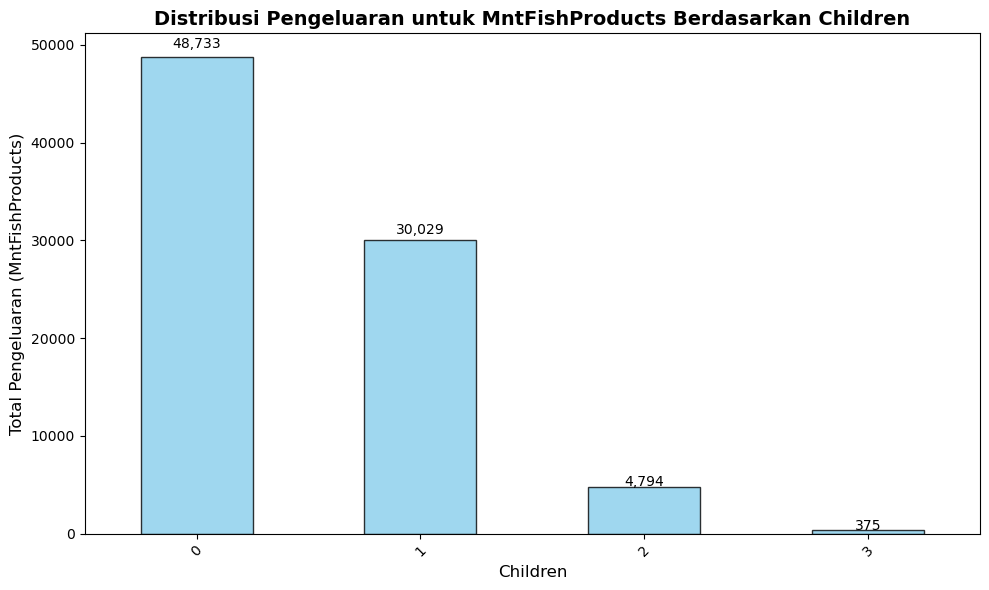

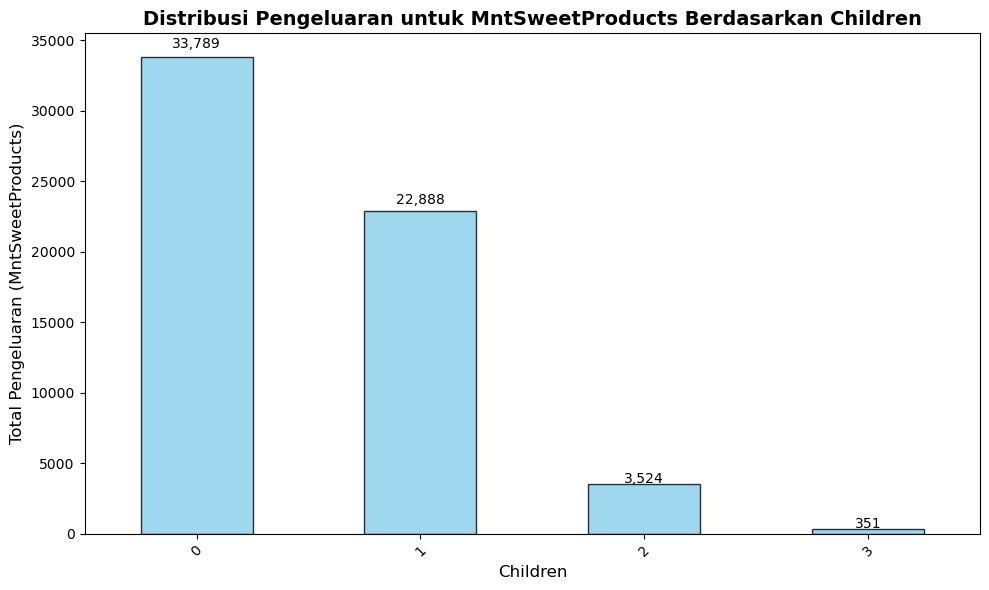

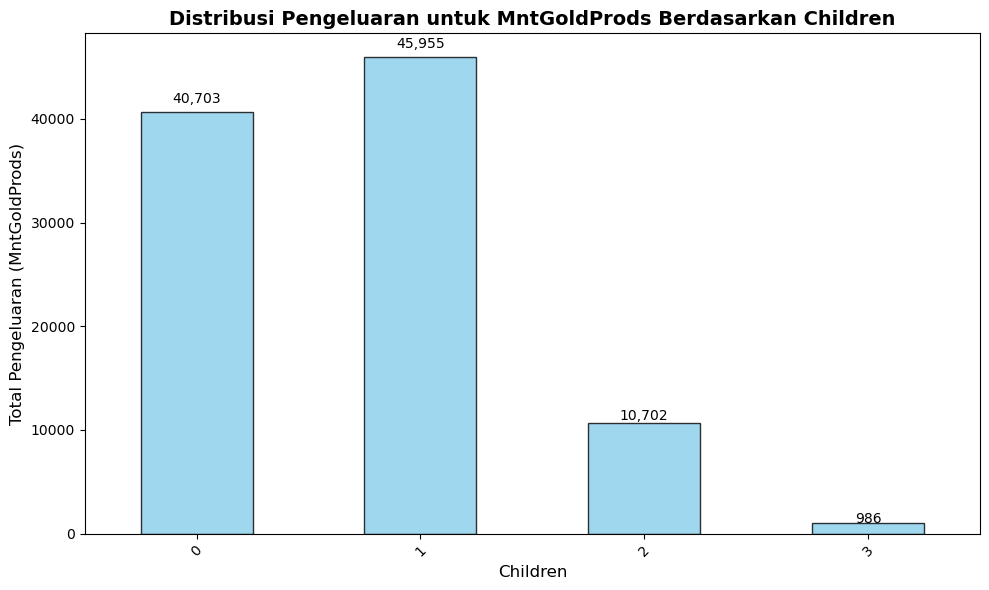

In [968]:
import matplotlib.pyplot as plt

# Kolom produk dan demografi
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
demographics = ['Generation', 'Education', 'Income_Class', 'Marital_Status', 'Children']

# Loop untuk setiap kategori demografi
for demo in demographics:
    # Mengelompokkan data berdasarkan demografi
    grouped_data = df_cleaned.groupby(demo)[product_columns].sum()
    
    # Loop untuk setiap kategori produk
    for product in product_columns:
        plt.figure(figsize=(10, 6))
        
        # Membuat bar plot untuk setiap kategori produk
        grouped_data[product].plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')
        plt.title(f"Distribusi Pengeluaran untuk {product} Berdasarkan {demo}", fontsize=14, fontweight='bold')
        plt.xlabel(demo, fontsize=12)
        plt.ylabel(f"Total Pengeluaran ({product})", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        
        # Menambahkan angka total di atas setiap bar
        for index, value in enumerate(grouped_data[product]):
            plt.text(index, value + (value * 0.02), f"{int(value):,}", ha='center', fontsize=10, color='black')
        
        plt.tight_layout()
        plt.show()


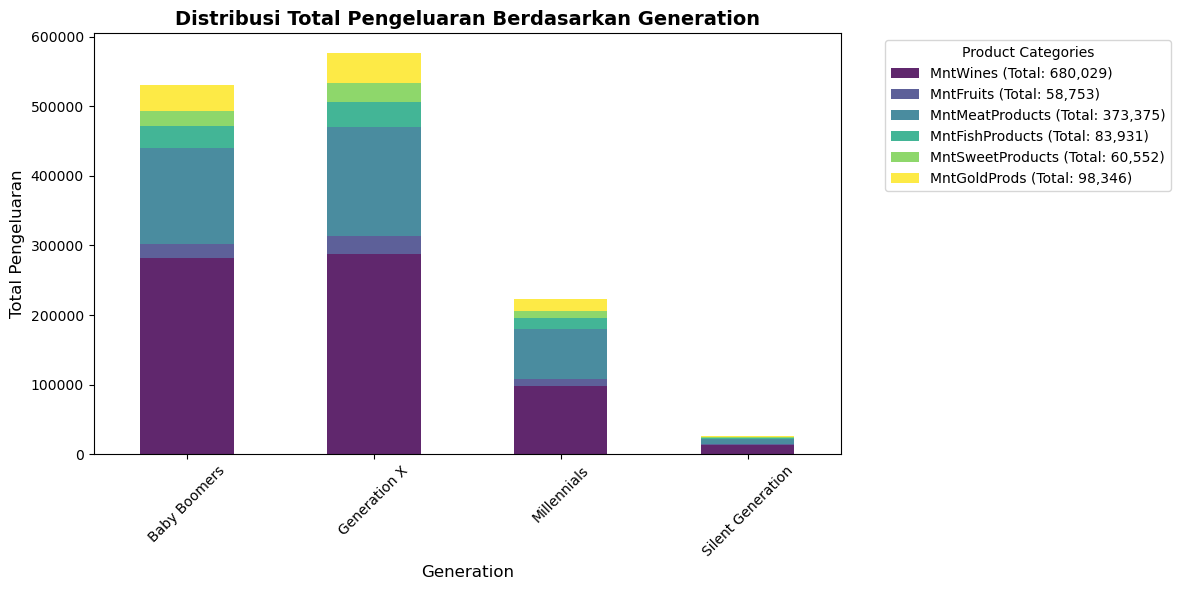

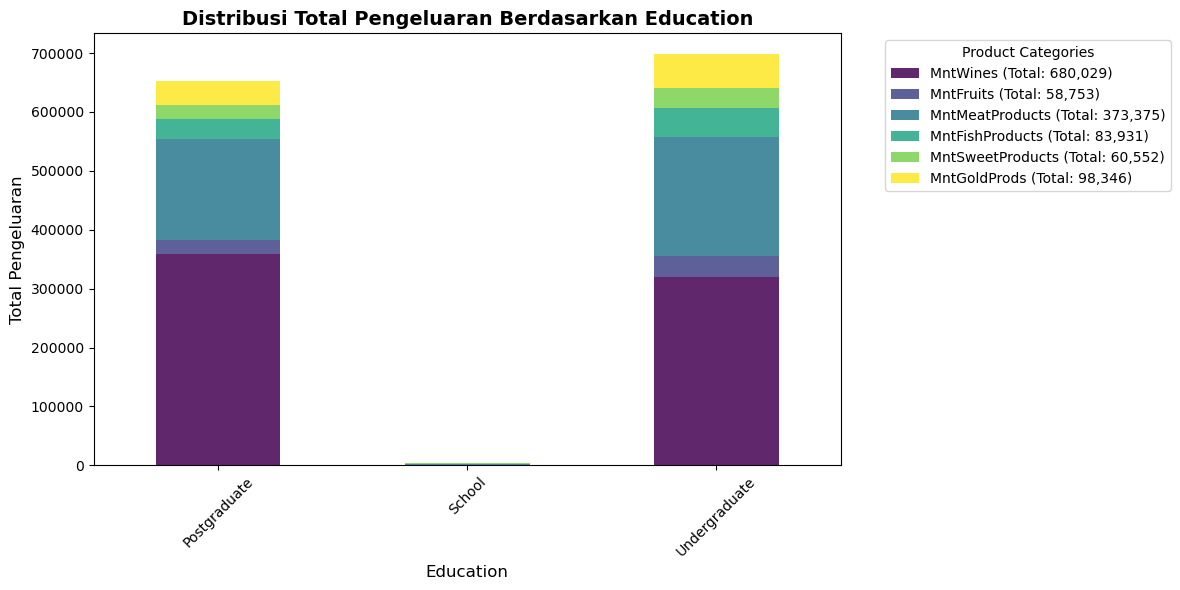

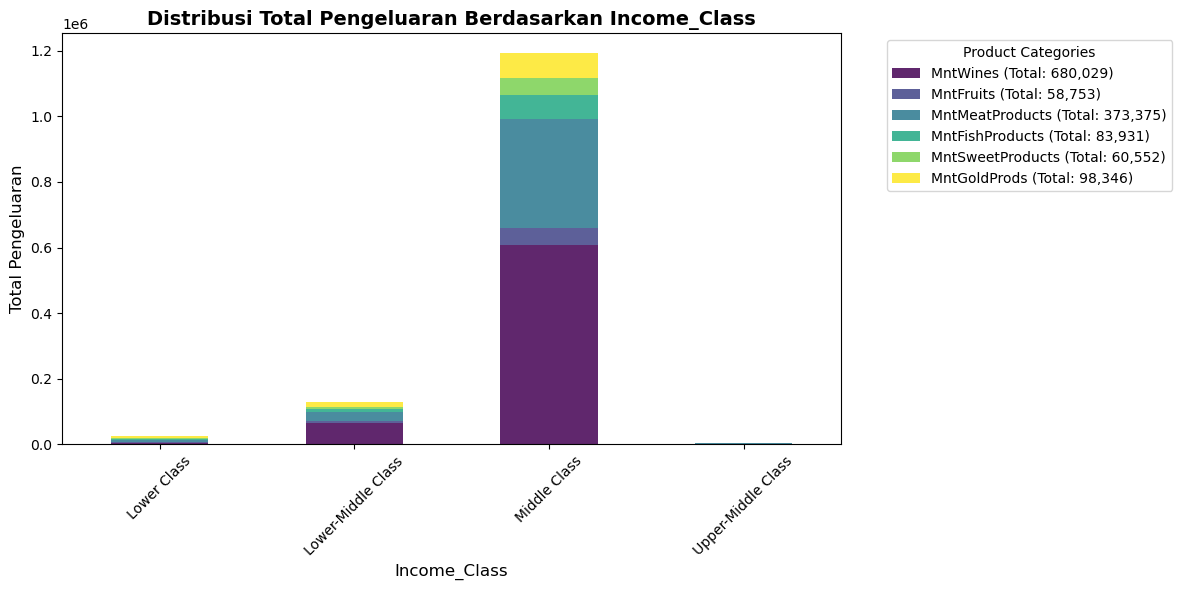

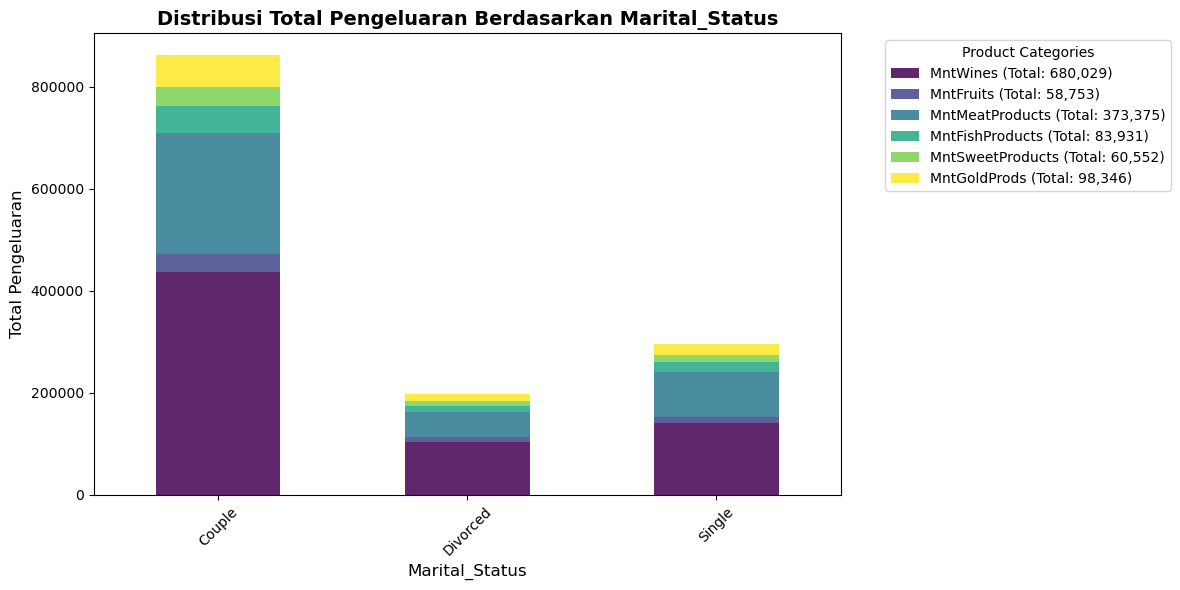

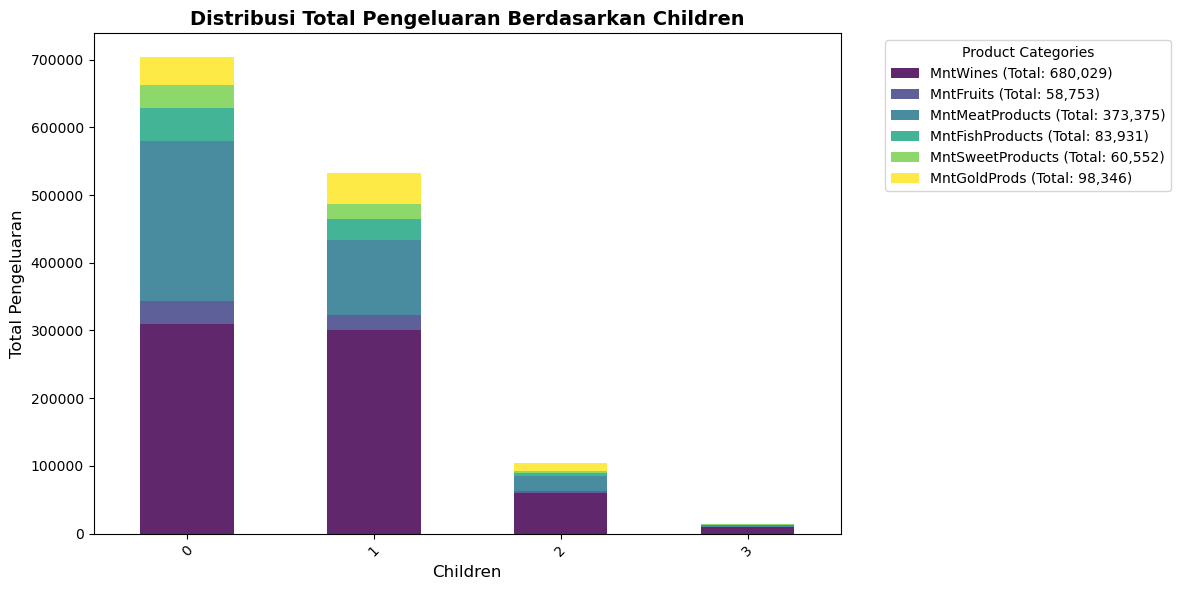

In [969]:
import matplotlib.pyplot as plt

# Kolom produk dan demografi
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
demographics = ['Generation', 'Education', 'Income_Class', 'Marital_Status', 'Children']

# Loop untuk setiap kategori demografi
for demo in demographics:
    # Mengelompokkan data berdasarkan demografi
    grouped_data = df_cleaned.groupby(demo)[product_columns].sum()
    
    # Hitung total pengeluaran untuk setiap kategori produk
    total_per_category = grouped_data.sum().to_dict()
    
    # Membuat label legend dengan total
    custom_legend_labels = [f"{col} (Total: {int(total_per_category[col]):,})" for col in product_columns]
    
    # Membuat plot stacked bar
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis', alpha=0.85)
    plt.title(f"Distribusi Total Pengeluaran Berdasarkan {demo}", fontsize=14, fontweight='bold')
    plt.xlabel(demo, fontsize=12)
    plt.ylabel("Total Pengeluaran", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    # Menambahkan legenda dengan total nilai
    plt.legend(custom_legend_labels, title="Product Categories", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    # Tata letak
    plt.tight_layout()
    plt.show()



Produk terlaris adalah Wine, sementara produk yang paling jarang dibeli adalah buah-buahan.

Terdapat korelasi yang cukup kuat antara:
- Buah-buahan dan produk ikan
- Daging dan produk ikan
- Permen dan produk ikan

#### Optimalisasi Skema Bundling Produk dengan uji korelasi

In [972]:
from scipy.stats import shapiro
import pandas as pd

# Tentukan kolom produk dan demografi
columns_to_test = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                   'Income', 'Kidhome', 'Teenhome', 'Age', 'Children']

# Melakukan uji normalitas Shapiro-Wilk untuk setiap kolom
normality_results = {}
for column in columns_to_test:
    stat, p_value = shapiro(df_cleaned[column])
    normality_results[column] = {
        'Shapiro Statistic': stat,
        'P-Value': f"{p_value:.3e}",  # Format ilmiah untuk p-value
        'Is Normal?': p_value > 0.05  # Jika p-value > 0.05, data berdistribusi normal
    }

# Konversi hasil ke dalam DataFrame untuk visualisasi
normality_results_df = pd.DataFrame(normality_results).T

# Tampilkan hasil
print(normality_results_df)


                 Shapiro Statistic    P-Value Is Normal?
MntWines                  0.838348  6.393e-43      False
MntFruits                  0.68922  1.699e-53      False
MntMeatProducts           0.729823  3.952e-51      False
MntFishProducts           0.708573  2.108e-52      False
MntSweetProducts          0.686755  1.244e-53      False
MntGoldProds              0.767646  1.214e-48      False
Income                    0.976031  6.351e-19      False
Kidhome                   0.676603  3.527e-54      False
Teenhome                  0.693984  3.119e-53      False
Age                       0.983349  1.665e-15      False
Children                  0.829888  1.056e-43      False


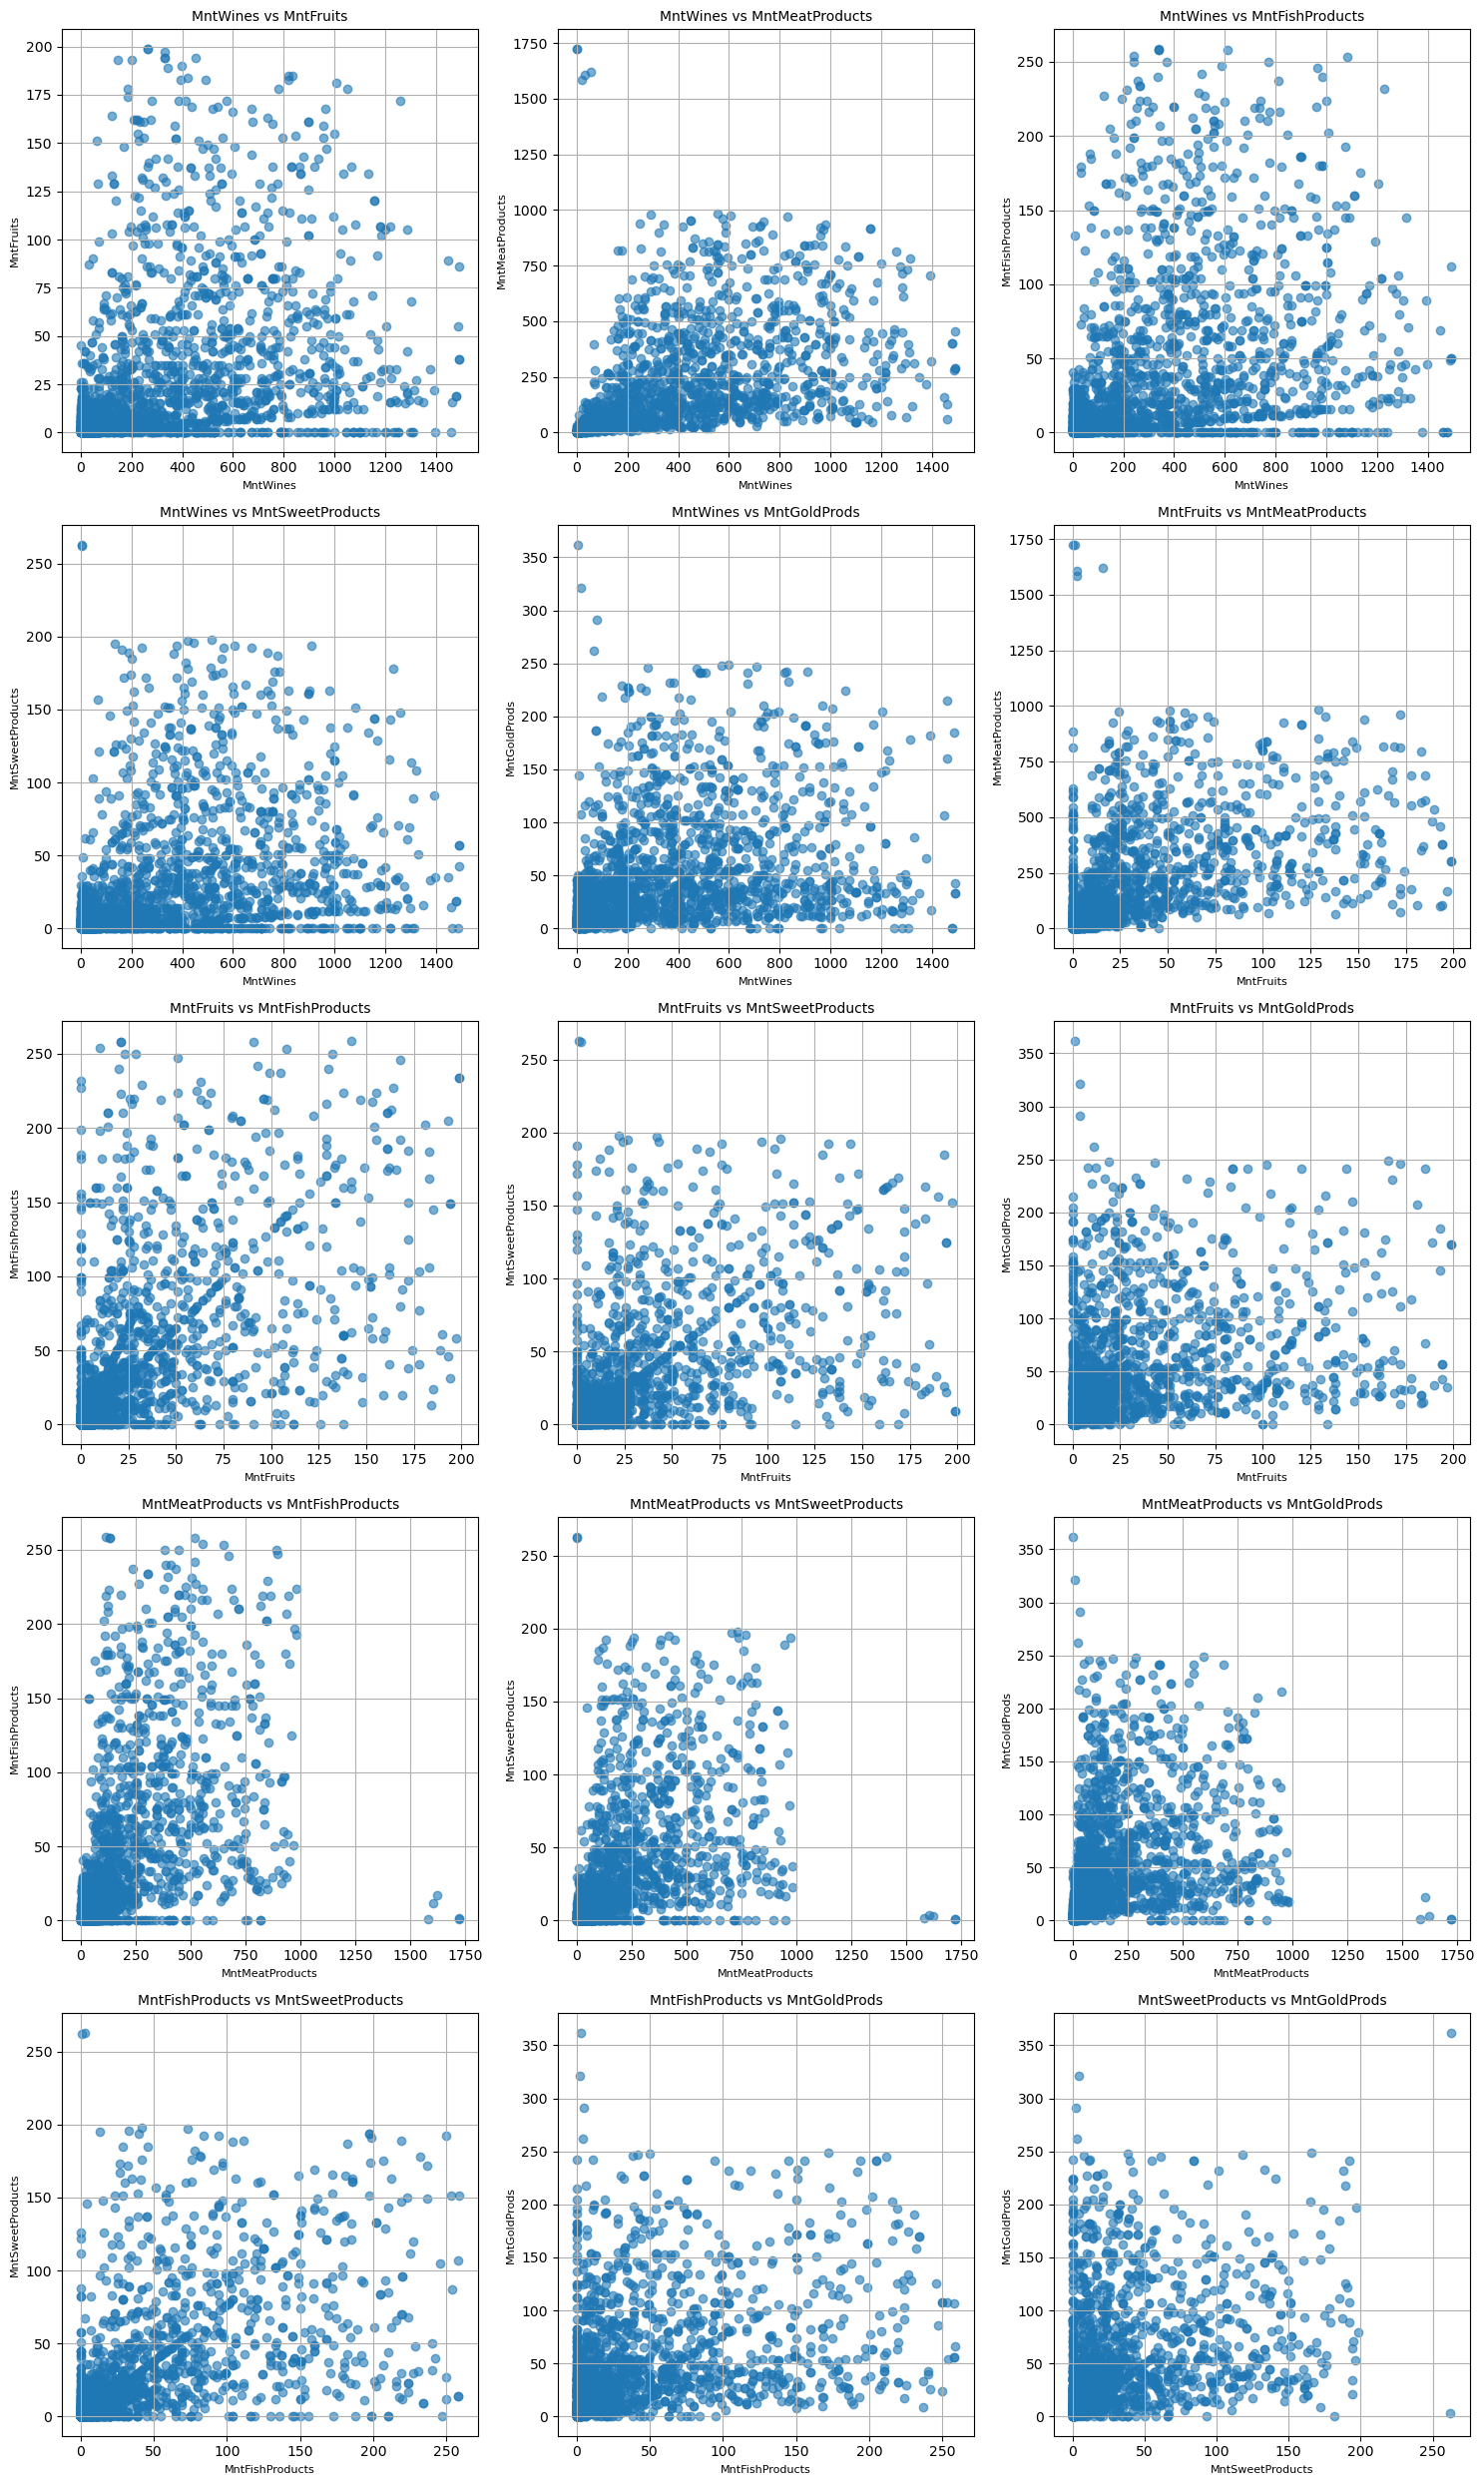

In [973]:
import matplotlib.pyplot as plt
import math

# Kolom produk dan demografi
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Menyimpan pasangan unik (tidak redundan)
pairs = [(col_x, col_y) for i, col_x in enumerate(columns_to_plot) for j, col_y in enumerate(columns_to_plot) if i < j]

# Mengatur jumlah kolom untuk grid
num_cols = 3
num_rows = math.ceil(len(pairs) / num_cols)  # Hitung jumlah baris yang diperlukan

# Membuat figure dan axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten menjadi array 1D untuk iterasi lebih mudah

# Loop untuk membuat scatterplot
for idx, (col_x, col_y) in enumerate(pairs):
    ax = axes[idx]
    ax.scatter(df_cleaned[col_x], df_cleaned[col_y], alpha=0.6)
    ax.set_title(f"{col_x} vs {col_y}", fontsize=10)
    ax.set_xlabel(col_x, fontsize=8)
    ax.set_ylabel(col_y, fontsize=8)
    ax.grid(True)

# Menghapus axes kosong jika ada
for idx in range(len(pairs), len(axes)):
    fig.delaxes(axes[idx])

# Menyusun layout
plt.tight_layout()
plt.show()


`Notes : Dikarenakan data terdsitribusi tidak normal dan persebaran datanya monotonic maka saya menggunakan uji korelasi spearman`

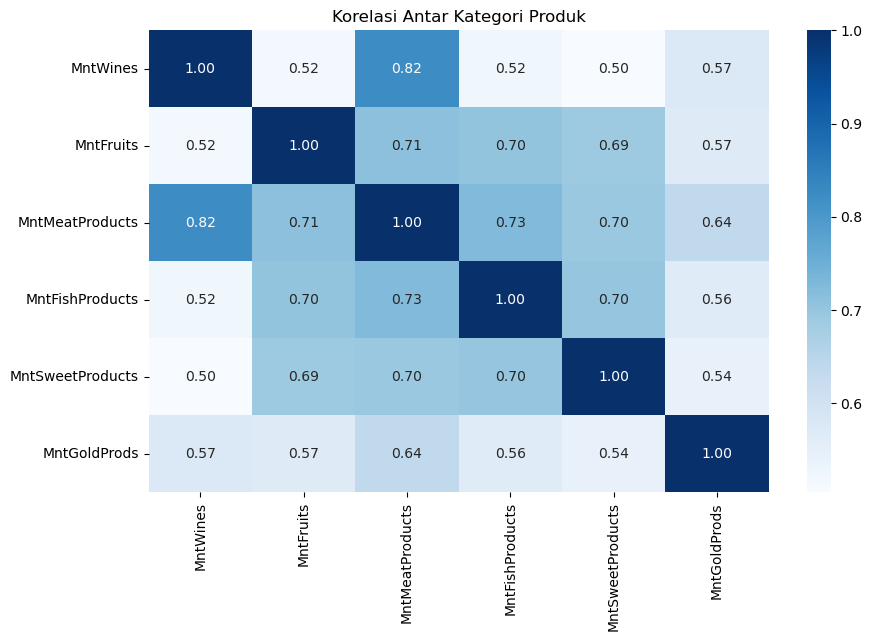

In [975]:
# Hitung korelasi antar kategori produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
category_spending_corr = df_cleaned[product_columns].corr(method="spearman")

# Visualisasi dengan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(category_spending_corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Korelasi Antar Kategori Produk')
plt.show()


In [1053]:
category_spending_corr.to_csv('corr.csv', index=False)

`Insight`:

**Korelasi Tinggi:**
- MntWines dan MntMeatProducts (0.82): Pelanggan yang membeli wine cenderung membeli daging, mencerminkan pola konsumsi untuk acara makan formal atau sosial.
- MntMeatProducts dan MntFishProducts (0.73): Pembelian daging sering disertai dengan ikan, menunjukkan preferensi terhadap sumber protein.
MntFruits dan MntMeatProducts (0.71): Pelanggan yang membeli daging juga cenderung membeli buah, mungkin untuk melengkapi pola makan sehat.

**Korelasi Moderat:**
- MntSweetProducts dengan MntWines (0.50): Kombinasi wine dan dessert menunjukkan potensi promosi bertema seperti "Wine & Dessert Night".
- MntGoldProds dengan MntMeatProducts (0.64): Produk emas kemungkinan dipilih bersamaan dengan daging untuk acara spesial.

# Kesimpulan

## 1. Identifikasi Produk Berdasarkan Revenue

### Produk dengan Revenue Tinggi:
#### Wine (MntWines):
- **Total Revenue**: $680,029
  
- **Dominasi Generasi**:
  - Generation X: $287,361
    
  - Baby Boomers: $281,786
    
- **Berdasarkan Demografi**:
  - Middle Class: $608,136
    
  - Pasangan Menikah: $435,946
    
  - Tanpa Anak: $310,146

#### Meat Products (MntMeatProducts):
- **Total Revenue**: $373,375
  
- **Dominasi Generasi**:
  - Generation X: $157,852
    
  - Baby Boomers: $137,138
    
- **Berdasarkan Demografi**:
  - Middle Class: $332,239
    
  - Pasangan Menikah: $235,749
    
  - Tanpa Anak: $237,163

### Produk dengan Revenue Rendah:
#### Fruits (MntFruits):
- **Total Revenue**: $58,753
  
- **Dominasi Generasi**:
  - Generation X: $25,612
    
  - Millennials: $11,018
    
- **Berdasarkan Demografi**:
  - Pasangan Menikah: $36,780
    
  - Tanpa Anak: $33,260

#### Fish Products (MntFishProducts):
- **Total Revenue**: $83,931
  
- **Dominasi Generasi**:
  - Generation X: $35,276
    
  - Baby Boomers: $31,367
    
- **Berdasarkan Demografi**:
  - Middle Class: $72,465
    
  - Pasangan Menikah: $53,072
    
  - Tanpa Anak: $48,733

#### Gold Products (MntGoldProds):
- **Total Revenue**: $98,346
  
- **Berdasarkan Demografi**:
  - Postgraduate: $39,818
    
  - Upper-Middle Class: $75,448
    
  - Pasangan Menikah: $61,700

#### Sweet Products (MntSweetProducts):
- **Total Revenue**: $60,552
  
- **Berdasarkan Demografi**:
  - Pasangan Menikah: $38,156
    
  - Tanpa Anak: $33,789

---


## 2. Identifikasi Berdasarkan Demografi

### Generasi:
- **Baby Boomers**:
- Dominasi produk premium:
  - Wine: $281,786
    
  - Meat: $137,138
    
  - Fish: $31,367
- **Generation X**:
- Dominasi produk:
  - Wine: $287,361
    
  - Meat: $157,852
    
  - Fish: $35,276
    
- **Millennials**:
- Fokus pada produk sehat:
  
  - Fruits: $11,018
    
  - Fish: $15,431
    
- **Silent Generation**:
- Kontribusi kecil pada semua kategori.

### Tingkat Pendidikan:
- **Postgraduate**:
- Fokus pada produk premium:
  
  - Wine: $359,276
    
  - Gold Products: $39,818
    
- **Undergraduate**:
-  Dominasi pada kategori:
  
  - Meat: $202,266
    
  - Fish: $48,622
    
- **School**:
- Membeli dalam jumlah kecil pada semua kategori.


### Pendapatan:
- **Middle Class**:
- Kontributor utama:
  
  - Wine: $608,136
    
  - Meat: $332,239
    
  - Fish: $72,465

    
- **Lower Class**:
- Membeli produk hemat:
  
  - Fruits: $2,126

    
- **Upper-Middle Class**:
- Fokus pada produk premium:
  
  - Gold Products: $75,448


### Status Pernikahan:
- **Pasangan Menikah**:
- Dominasi pembelian:
  
  - Wine: $435,946
    
  - Meat: $235,749
    
  - Fish: $53,072

    
- **Singles**:
- Fokus pada produk praktis:
  
  - Sweet Products: $13,174


### Jumlah Anak:
- **Tanpa Anak**:
- Dominasi pembelian:
  
  - Wine: $310,146
    
  - Meat: $237,163
    
  - Fish: $48,733
 
    
- **Banyak Anak (2-3)**:
- Fokus pada kebutuhan dasar:
  - Fruits: $3,317
    
  - Fish: $4,794

---

## 3. Identifikasi Korelasi Antar Produk
- **Wine dan Meat Products**:
- Korelasi tinggi (0.82)
  
  - potensi bundling untuk segmen premium.
 
    
- **Fish dan Fruits**:
- Korelasi moderat (0.70)
  - cocok untuk paket sehat.







## Rekomendasi
### 1. Strategi untuk Mempertahankan Produk dengan Revenue Tinggi
### Wine (MntWines):

#### Acara Eksklusif:
Adakan acara seperti "Wine Tasting Night" untuk meningkatkan loyalitas pelanggan, terutama bagi Generation X dan Baby Boomers.

#### Promosi Berbasis Data:
Targetkan pelanggan dari Middle Class dan Pasangan Menikah dengan penawaran spesial.


### Meat Products (MntMeatProducts):

#### Promosi Paket Keluarga:
Tawarkan paket daging dengan kebutuhan mingguan lainnya seperti sayuran dan ikan, dengan penekanan pada Middle Class dan Pasangan Menikah.

#### Kampanye Kualitas Produk:
Soroti aspek kesehatan seperti daging bebas antibiotik untuk menarik pelanggan peduli kesehatan.
Fish Products (MntFishProducts):

#### Kampanye Hidup Sehat:
Luncurkan promosi yang menyoroti manfaat kesehatan dari konsumsi fish, untuk menarik Millennials dan Generation X.

#### Bundling dengan Produk Sehat Lain:
Gabungkan fish dengan fruits dalam paket sehat untuk menarik segmen Millennials dan Postgraduate.

### 2. Strategi untuk Produk dengan Revenue Rendah
### Fruits dan Fish:

#### Kampanye Hidup Sehat:
Luncurkan promosi yang menyoroti manfaat kesehatan dari konsumsi fruits dan fish.

#### Bundling dengan Produk Sehat Lain:
Gabungkan fish dengan fruits dalam paket sehat, dengan penekanan pada pelanggan yang peduli dengan kesehatan.

### Gold Products:

#### Promosikan sebagai Hadiah Eksklusif:
Pasarkan sebagai hadiah premium untuk acara spesial seperti ulang tahun dan pernikahan, dengan fokus pada Postgraduate dan Upper-Middle Class.

#### Bundling Premium:
Gabungkan produk gold dengan wine dalam paket hadiah eksklusif untuk Pasangan Menikah.

### Sweet Products:

#### Promosi Musiman:
Luncurkan diskon selama liburan atau acara khusus seperti Hari Valentine atau Natal.

#### Diversifikasi Produk:
Sediakan produk manis rendah gula untuk menarik perhatian pelanggan peduli kesehatan.

### 3. Pendekatan Berdasarkan Demografi
### Baby Boomers dan Generation X:
Fokus pada acara eksklusif seperti wine tasting dan diskon pembelian dalam jumlah besar, terutama untuk produk premium.

### Millennials:
Promosikan produk sehat seperti fruits dan fish di media sosial. Sesuaikan dengan produk dalam ukuran kecil untuk mempermudah aksesibilitas.

### Postgraduate:
Fokus pada produk premium seperti gold dan wine. Berikan layanan tambahan seperti pengiriman gratis untuk pelanggan dengan Pendapatan Tinggi.

### Pasangan Menikah (Couples):
Tawarkan bundling keluarga seperti "Family Feast Bundle" dengan kombinasi produk seperti wine dan meat.

### Rumah Tangga dengan Banyak Anak:
Diskon untuk pembelian besar kebutuhan dasar seperti fish dan fruits, serta bundling produk mingguan dengan harga lebih murah.

### 4. Optimalisasi Skema Bundling Produk
### Bundle Premium:
Gabungkan wine, meat, dan gold untuk menarik pelanggan premium Middle Class dan Upper-Middle Class.

### Paket Sehat:
Fruits dan fish dalam bundling "Healthy Living Pack" untuk Millennials dan Postgraduate.

### Paket Keluarga:
Gabungkan meat, fish, dan fruits dalam satu paket untuk memenuhi kebutuhan mingguan keluarga besar Couples.